# BITS F312 - Neural Network and Fuzzy Logic



## Assignment 1

In [22]:
# importing libraries required
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import random
warnings.filterwarnings('ignore')

In [2]:
# connecting gdrive to access the datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# finding out current working directory
!pwd

/content


In [4]:
# changing directory to - 'drive/MyDrive/NNFL/Data_A1/'
%cd drive/MyDrive/NNFL/Data_A1/

/content/drive/MyDrive/NNFL/Data_A1


In [5]:
# defining plotting style
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (14, 14)

### Q1
Implement linear regression (LR) approach using batch gradient descent (BGD),
stochastic gradient descent (SGD), and mini-batch gradient descent (MBGD)
algorithms. Show the cost-function vs. epoch plots for LR with BGD, LR with SGD,
and LR with MBGD models. Show the contour plots for cost function vs. w1 vs. w2
evaluated using LR with BGD, LR with SGD, and LR with MBGD models. For Q1,
the data-q1.xlsx file must be used. The data q1.xlsx file contains two inputs and one output. You can consider w1 and w2 are the weight values of features.

### Linear Regression using Batch Gradient Descent 

In [ ]:
# value predicted from current weights
def pred_BGD(x, w):
  return (np.dot(x,w))

In [ ]:
# cost/loss function
def cost_BGD(y, x, w):
  pred_val = pred_BGD(x,w)
  val = np.sum((pred_val-y)**2)
  return val/(2*(x.shape[0]))

In [ ]:
# weight updation 
def update_BGD(x, y, w, alpha = 0.001):
  w = w - alpha*(np.sum((pred_BGD(x,w)-y).dot(x)))/(x.shape[0])
  return w

In [ ]:
# Batch Gradient Function
def BGD(filename):
  datasetQ1 = pd.read_excel(filename) # dataset for Q1

  X = (np.array([np.ones(len(datasetQ1)),datasetQ1['Feature 1'], datasetQ1['Feature 2']])).T # Extracting the X vector from the dataset 
  Y = (np.array(datasetQ1['Output'])).T # Extracting the Y vector
  
  # randomizing intial values of the weights
  W = (np.random.randn(3)).T

  ALPHA = 0.001 # declaring the learning rate 

  costs = [] # to save the cost value for each epoch
  w1 = [] # to save the w1 weight for each epoch
  w2 = [] # to save the w2 weight for each epoch

  EPOCH = 100
  for iteration in range(EPOCH):
    costs.append(cost_BGD(Y,X,W))
    w1.append(W[1])
    w2.append(W[2])
    W = update_BGD(X,Y,W)
  
  # returns the log of values of the cost, and the weights for each iteration as well as the Weight Matrix
  return costs, w1, w2, W 

In [ ]:
# Plotting the Cost Function v/s Epochs
def plot_costs_BGD(costs):
  plt.plot(costs)
  plt.xlabel('Epochs')
  plt.ylabel('Cost Function (Mean squared error)')
  plt.title('Cost Function v/s Epochs (Batch Gradient Descent)')

In [ ]:
# Cost function v/s w1 v/s w2 

def plot_BGD_costW1W2(costs, w1, w2):
  
  fig = plt.figure()

  # defining 3D plot
  ax = plt.axes(projection='3d')
  ax.plot3D(costs, w1, w2)
  
  # labelling
  plt.title('Cost v/s W1 v/s W2 (Batch Gradient Descent)')
  ax.set_xlabel('Cost', fontsize = 20)
  ax.set_ylabel('W1', fontsize = 20)
  ax.set_zlabel('W2', fontsize = 20)

  # Adjusting the labels for better presentation
  ax.xaxis.labelpad=20
  ax.yaxis.labelpad=20
  ax.zaxis.labelpad=20

#### Output

In [ ]:
costs_BGD, w1_BGD, w2_BGD, W_BGD  = BGD('data_q1.xlsx')

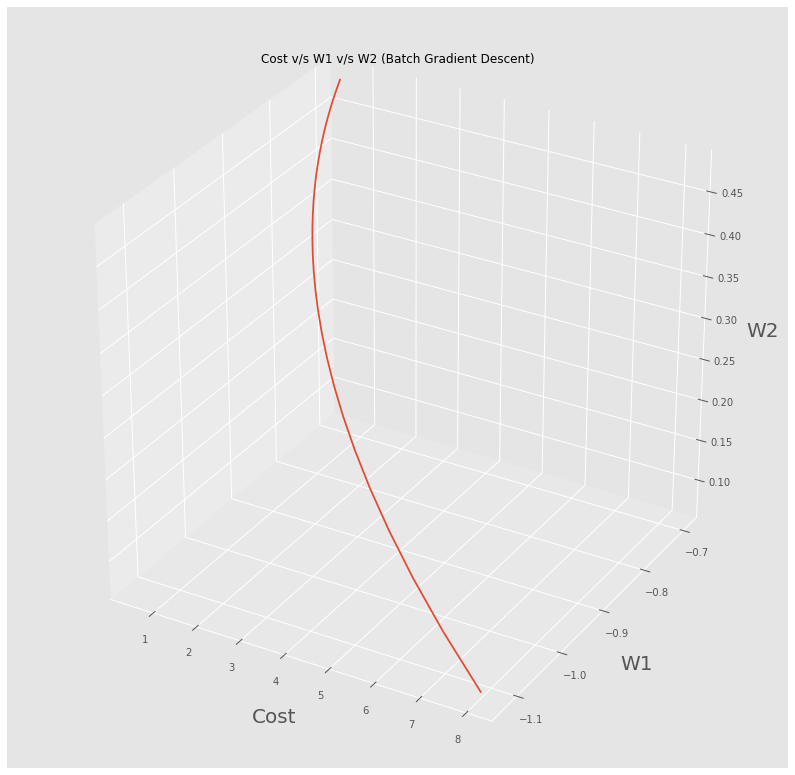

In [ ]:
plot_BGD_costW1W2(costs_BGD, w1_BGD, w2_BGD)

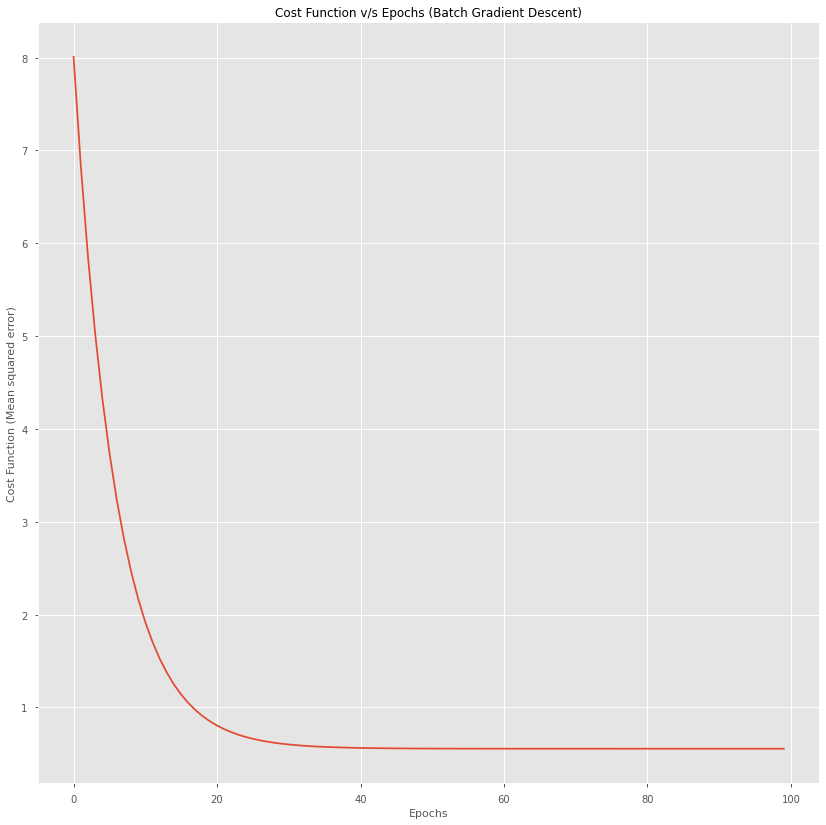

In [ ]:
plot_costs_BGD(costs_BGD)

### Linear Regression using Stochastic Gradient Descent

In [ ]:
# value predicted from current weights
def pred_SGD(x, w):
  return (np.dot(x,w))

In [ ]:
# cost/loss function
def cost_SGD(y, x, w):
  pred_val = pred_SGD(x,w)
  val = np.sum((pred_val-y)**2)
  return val/(2*(x.shape[0]))

In [ ]:
# weight updation 
def update_SGD(x, y, w, alpha = 0.001):
  idx = np.random.randint(0,x.shape[0])
  w = w - alpha*(np.sum((pred_SGD(x[idx],w)-y[idx])*(x[idx])))/(x.shape[0])
  return w

In [ ]:
# Batch Gradient Function
def SGD(filename):
  datasetQ1 = pd.read_excel(filename) # dataset for Q1

  X = (np.array([np.ones(len(datasetQ1)),datasetQ1['Feature 1'], datasetQ1['Feature 2']])).T # Extracting the X vector from the dataset 
  Y = (np.array(datasetQ1['Output'])).T # Extracting the Y vector
  
  # randomizing intial values of the weights
  W = (np.random.randn(3)).T

  ALPHA = 0.001 # declaring the learning rate 

  costs = [] # to save the cost value for each epoch
  w1 = [] # to save the w1 weight for each epoch
  w2 = [] # to save the w2 weight for each epoch

  EPOCH = 5000
  for iteration in range(EPOCH):
    costs.append(cost_SGD(Y,X,W))
    w1.append(W[1])
    w2.append(W[2])
    W = update_SGD(X,Y,W)
  
  # returns the log of values of the cost, and the weights for each iteration as well as the Weight Matrix
  return costs, w1, w2, W 

In [ ]:
# Plotting the Cost Function v/s Epochs
def plot_costs_SGD(costs):
  plt.plot(costs)
  plt.xlabel('Epochs')
  plt.ylabel('Cost Function (Mean squared error)')
  plt.title('Cost Function v/s Epochs (Stochastic gradient descent)')

In [ ]:
# Cost function v/s w1 v/s w2 

def plot_SGD_costW1W2(costs, w1, w2):
  
  fig = plt.figure()

  # defining 3D plot
  ax = plt.axes(projection='3d')
  ax.plot3D(costs, w1, w2)
  
  # labelling
  plt.title('Cost v/s W1 v/s W2 (Stochastic gradient descent)')
  ax.set_xlabel('Cost', fontsize = 20)
  ax.set_ylabel('W1', fontsize = 20)
  ax.set_zlabel('W2', fontsize = 20)

  # Adjusting the labels for better presentation
  ax.xaxis.labelpad=20
  ax.yaxis.labelpad=20
  ax.zaxis.labelpad=20


#### Output

In [ ]:
costs_SGD, w1_SGD, w2_SGD, W_SGD  = SGD('data_q1.xlsx')

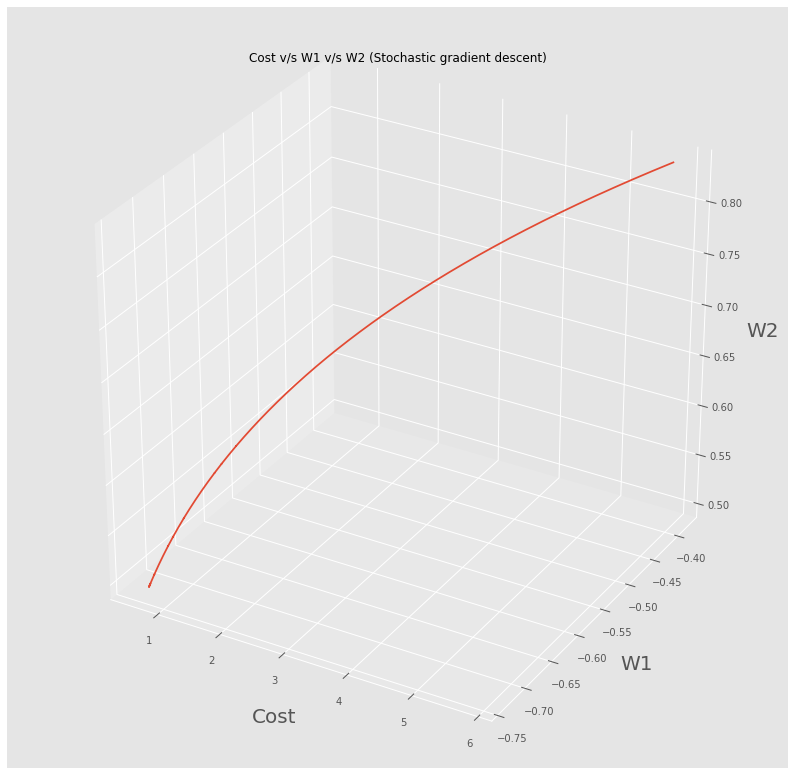

In [ ]:
plot_SGD_costW1W2(costs_SGD, w1_SGD, w2_SGD)

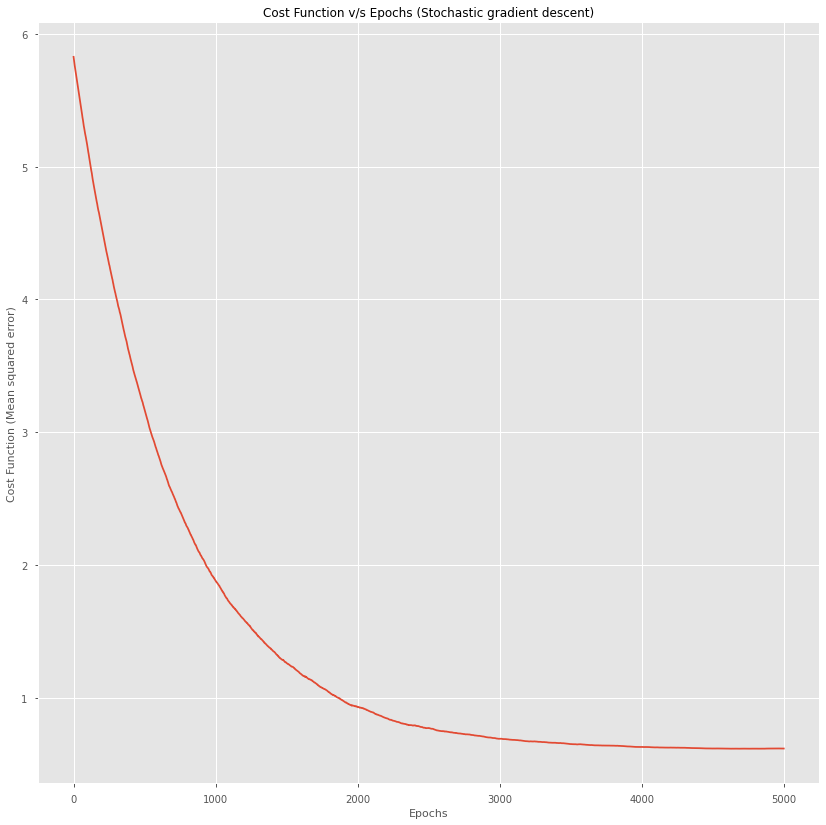

In [ ]:
plot_costs_SGD(costs_SGD)

### Linear Regression using Mini Batch Gradient Descent

In [ ]:
# value predicted from current weights
def pred_MBGD(x, w):
  return (np.dot(x,w))

In [ ]:
# cost/loss function
def cost_MBGD(y, x, w):
  pred_val = pred_MBGD(x,w)
  val = np.sum((pred_val-y)**2)
  return val/(2*(x.shape[0]))

In [ ]:
def update_MBGD(data, w, batch_size = 32, alpha = 0.001):
  # Making Random Mini Batch
  idx = np.random.randint(115, size=32)

  w = w - alpha*(np.sum((pred_MBGD(data[idx, :3],w)-data[idx, 3]).dot(data[idx, :3])))/((data[idx, :3]).shape[0])
  
  return w

In [ ]:
# Batch Gradient Function
def MBGD(filename):
  datasetQ1 = pd.read_excel(filename) # dataset for Q1

  X = (np.array([np.ones(len(datasetQ1)),datasetQ1['Feature 1'], datasetQ1['Feature 2']])).T # Extracting the X vector from the dataset 
  Y = (np.array(datasetQ1['Output'])).T # Extracting the Y vector
  
  # randomizing intial values of the weights
  W = (np.random.randn(3)).T

  X0 = X[:, 0]
  X1 = X[:, 1]
  X2 = X[:, 2]

  data = np.column_stack((X0, X1, X2, Y))


  ALPHA = 0.001 # declaring the learning rate 

  costs = [] # to save the cost value for each epoch
  w1 = [] # to save the w1 weight for each epoch
  w2 = [] # to save the w2 weight for each epoch

  EPOCH = 1000
  for iteration in range(EPOCH):
    costs.append(cost_MBGD(Y, X, W))
    w1.append(W[1])
    w2.append(W[2])
    W = update_MBGD(data,W,ALPHA)
  
  # returns the log of values of the cost, and the weights for each iteration as well as the Weight Matrix
  return costs, w1, w2, W 

In [ ]:
# Plotting the Cost Function v/s Epochs
def plot_costs_MBGD(costs):
  plt.plot(costs)
  plt.xlabel('Epochs')
  plt.ylabel('Cost Function (Mean squared error)')
  plt.title('Cost Function v/s Epochs (Mini Batch Gradient Descent)')

In [ ]:
# Cost function v/s w1 v/s w2 

def plot_MBGD_costW1W2(costs, w1, w2):
  
  fig = plt.figure()

  # defining 3D plot
  ax = plt.axes(projection='3d')
  ax.plot3D(costs, w1, w2)
  
  # labelling
  plt.title('Cost v/s W1 v/s W2 (Mini Batch Gradient Descent)')
  ax.set_xlabel('Cost', fontsize = 20)
  ax.set_ylabel('W1', fontsize = 20)
  ax.set_zlabel('W2', fontsize = 20)

  # Adjusting the labels for better presentation
  ax.xaxis.labelpad=20
  ax.yaxis.labelpad=20
  ax.zaxis.labelpad=20


In [ ]:
# Plotting the Cost Function v/s Epochs
def plot_costs_MBGD(costs):
  plt.plot(costs)
  plt.xlabel('Epochs')
  plt.ylabel('Cost Function (Mean squared error)')
  plt.title('Cost Function v/s Epochs (Mini Batch Gradient Descent)')

In [ ]:
# Cost function v/s w1 v/s w2 

def plot_MBGD_costW1W2(costs, w1, w2):
  
  fig = plt.figure()

  # defining 3D plot
  ax = plt.axes(projection='3d')
  ax.plot3D(costs, w1, w2)
  
  # labelling
  plt.title('Cost v/s W1 v/s W2 (Mini Batch Gradient Descent)')
  ax.set_xlabel('Cost', fontsize = 20)
  ax.set_ylabel('W1', fontsize = 20)
  ax.set_zlabel('W2', fontsize = 20)

  # Adjusting the labels for better presentation
  ax.xaxis.labelpad=20
  ax.yaxis.labelpad=20
  ax.zaxis.labelpad=20


### Output

In [ ]:
costs_MBGD, w1_MBGD, w2_MBGD, W_MBGD  = MBGD('data_q1.xlsx')

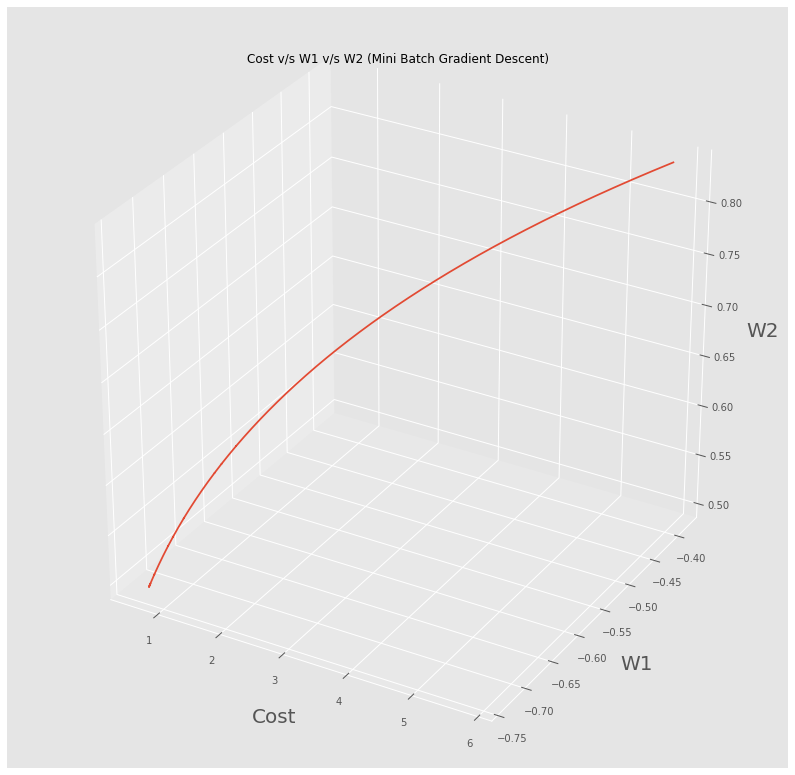

In [ ]:
plot_MBGD_costW1W2(costs_SGD, w1_SGD, w2_SGD)

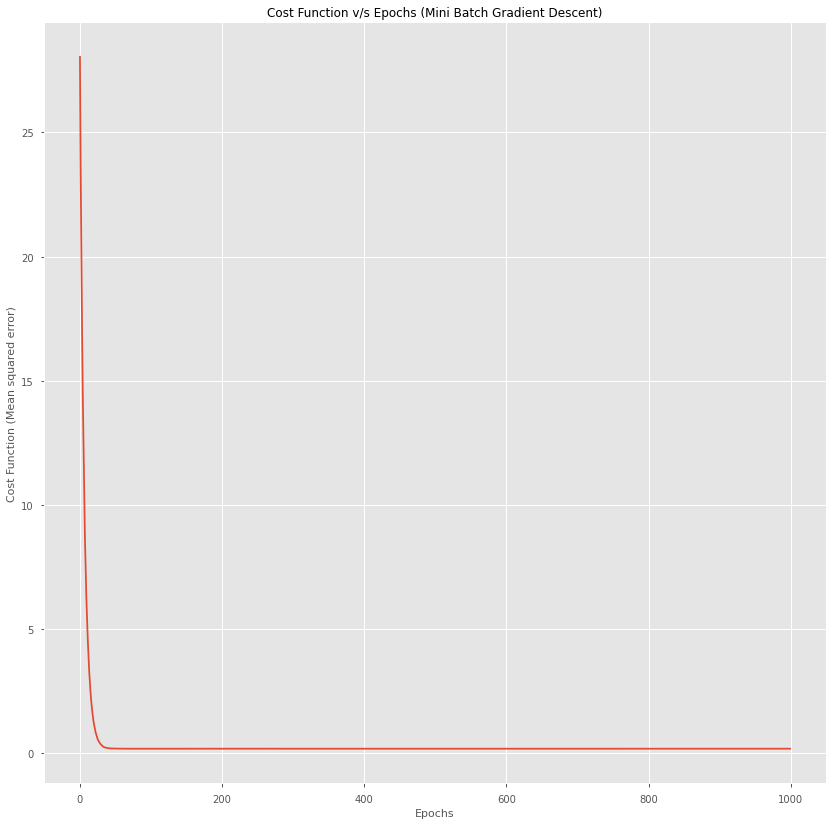

In [ ]:
plot_costs_MBGD(costs_MBGD)

### Q2
Implement linear regression with the L2-norm regularization (Ridge regression)
approach using BGD, SGD, and MBGD algorithms. The ridge regression model
weight parameters must be evaluated from the training data. After evaluating the
weight parameters, evaluate the predicted output for the parameters, evaluate the predicted output for the test feature vectors. For Q2, the data_q2_q3.xlsx file must be used. Evaluate the mean square error (MSE), mean absolute error (MAE), and correlation coefficient (CC) by comparing the actual test output and predicted test output for ridge regression models with BGD, SGD, and MBGD algorithms. You can use grid search to evaluate the optimal parameters of the model. You can divide the dataset into training, validation, and testing using hold-out cross-validation (70% (training), 10% (validation), and 20% (testing)).

### L2-norm regularization (Ridge regression) approach using BGD

In [ ]:
# value predicted from current weights
def pred_BGD_L2(x, w):
  return (np.dot(x,w))

In [ ]:
# cost/loss function
def cost_BGD_L2(y, x, w):
  pred_val = pred_BGD_L2(x,w)
  val = np.sum((pred_val-y)**2)
  return val/(2*(x.shape[0]))

In [ ]:
# weight updation 
def update_BGD_L2(x, y, w, alpha = 0.001, lambd = 0.005):
  w = w - alpha*(np.sum((pred_BGD_L2(x,w)-y).dot(x)))/(x.shape[0]) - (alpha*lambd)*w
  return w

In [ ]:
def MSE(X, Y, W):
  return (np.square((pred_BGD_L2(X, W) - Y))).mean() 

In [ ]:
def MAE(X, Y, W):
  return (np.abs((pred_BGD_L2(X, W) - Y))).mean()

In [ ]:
def CC(X, Y, W):
  Y_pred = pred_BGD_L2(X, W)
  num = np.mean((Y_pred - np.mean(Y_pred))*(Y - np.mean(Y)))
  den = np.sqrt((np.mean(np.square(Y_pred-np.mean(Y_pred))))*(np.mean(np.square(Y-np.mean(Y)))))
  return num/den

In [ ]:
# Batch Gradient Function
def BGD_L2(filename):
  datasetQ2 = pd.read_excel(filename) # dataset for Q2
  # shuffling the data for performing hold-out cross-validation
  df = datasetQ2.sample(frac=1).reset_index(drop=True)
  df_training = df[:70]
  df_validation = df[70:80]
  df_testing = df[80:]

  X_train = (np.array([np.ones(len(df_training)),df_training['Feat1'], df_training['Feat2'], df_training['Feat3'], df_training['Feat4']])).T # Extracting the X vector from the dataset 
  Y_train = (np.array(df_training['Output'])).T # Extracting the Y vector

  X_validation = (np.array([np.ones(len(df_validation)),df_validation['Feat1'], df_validation['Feat2'], df_validation['Feat3'], df_validation['Feat4']])).T # Extracting the X vector from the dataset 
  Y_validation = (np.array(df_validation['Output'])).T # Extracting the Y vector

  X_testing = (np.array([np.ones(len(df_testing)),df_testing['Feat1'], df_testing['Feat2'], df_testing['Feat3'], df_testing['Feat4']])).T # Extracting the X vector from the dataset 
  Y_testing = (np.array(df_testing['Output'])).T # Extracting the Y vector

  
  
  # randomizing intial values of the weights
  W = (np.random.randn((X_train.shape)[1])).T

  ALPHA = 0.001 # declaring the learning rate 

  costs = [] # to save the cost value for each epoch

  EPOCH = 500
  for iteration in range(EPOCH):
    costs.append(cost_BGD_L2(Y_train,X_train,W))
    W = update_BGD_L2(X_train,Y_train,W)
  
  print("Evaluation for Training Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_train,Y_train,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_train,Y_train,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_train,Y_train,W)))

  print("Evaluation for Testing Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_testing,Y_testing,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_testing,Y_testing,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_testing,Y_testing,W)))

  print("Evaluation for Validation Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_validation,Y_validation,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_validation,Y_validation,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_validation,Y_validation,W)))

  
  # returns the log of values of the cost, and the weights for each iteration as well as the Weight Matrix
  return costs, W 

In [ ]:
# Plotting the Cost Function v/s Epochs
def plot_costs_BGD_L2(costs):
  plt.plot(costs)
  plt.xlabel('Epochs')
  plt.ylabel('Cost Function (Mean squared error)')
  plt.title('Cost Function v/s Epochs (Batch Gradient Descent)')

### Output


In [ ]:
costs_BGD_L2, W_BGD_L2  = BGD_L2('data_q2_q3.xlsx')

Evaluation for Training Data
----------------------------
Mean Sqaured Error (MSE): 0.20192138635585238
Mean Absolute Error (MAE): 0.20192138635585238
Correlation Coefficent (CC): 0.5611894427313313
Evaluation for Testing Data
----------------------------
Mean Sqaured Error (MSE): 0.18557482347591567
Mean Absolute Error (MAE): 0.18557482347591567
Correlation Coefficent (CC): 0.5675215613739688
Evaluation for Validation Data
----------------------------
Mean Sqaured Error (MSE): 0.1529151458704375
Mean Absolute Error (MAE): 0.1529151458704375
Correlation Coefficent (CC): 0.5456414000112311


In [ ]:
for val in range(len(W_BGD_L2)):
  print('W{0}: {1}'.format(val, W_BGD_L2[val]))

W0: -0.6947351093996791
W1: 1.8331885361206992
W2: 0.21391529633810125
W3: 0.013189872226809932
W4: 0.46767778615396394


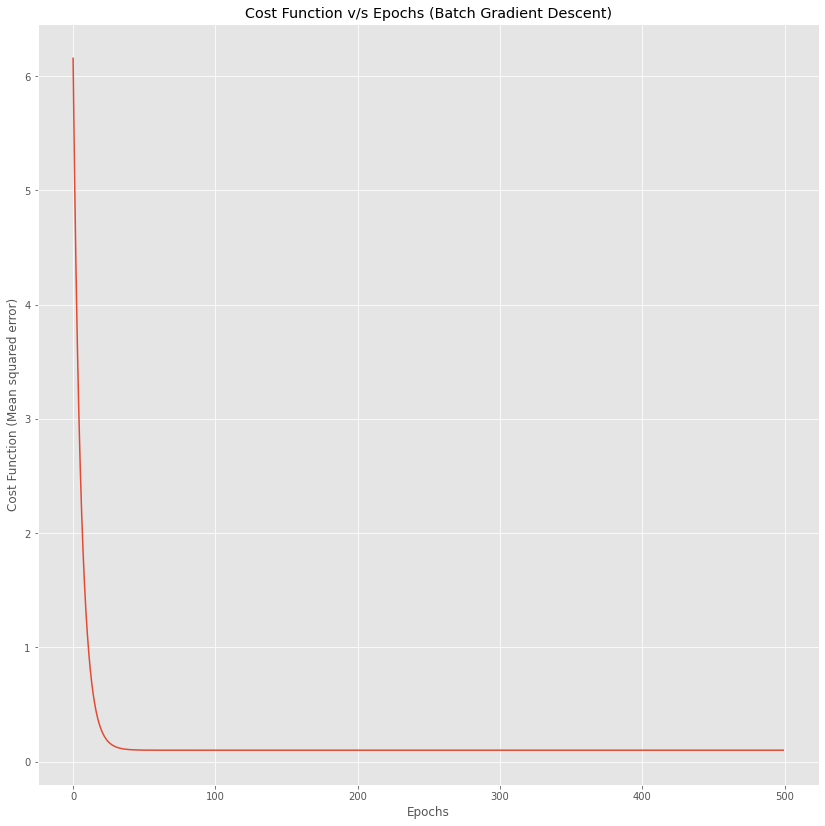

In [ ]:
plot_costs_BGD_L2(costs_BGD_L2)

### L2-norm regularization (Ridge regression) approach using SGD

In [ ]:
# value predicted from current weights
def pred_SGD_L2(x, w):
  return (np.dot(x,w))

In [ ]:
# cost/loss function
def cost_SGD_L2(y, x, w):
  pred_val = pred_SGD_L2(x,w)
  val = np.sum((pred_val-y)**2)
  return val/(2*(x.shape[0]))

In [ ]:
# weight updation 
def update_SGD_L2(x, y, w, alpha = 0.001, lambd = 0.05):

  idx = np.random.randint(0,x.shape[0])
  w = w - alpha*(np.sum((pred_SGD_L2(x[idx],w)-y[idx])*(x[idx])))/(x.shape[0]) - (alpha*lambd)*w
  return w


In [ ]:
def MSE(X, Y, W):
  return (np.square((pred_SGD_L2(X, W) - Y))).mean() 

In [ ]:
def MAE(X, Y, W):
  return (np.abs((pred_SGD_L2(X, W) - Y))).mean()

In [ ]:
def CC(X, Y, W):
  Y_pred = pred_SGD_L2(X, W)
  num = np.mean((Y_pred - np.mean(Y_pred))*(Y - np.mean(Y)))
  den = np.sqrt((np.mean(np.square(Y_pred-np.mean(Y_pred))))*(np.mean(np.square(Y-np.mean(Y)))))
  return num/den

In [ ]:
# Batch Gradient Function
def SGD_L2(filename):
  datasetQ2 = pd.read_excel(filename) # dataset for Q2
  # shuffling the data for performing hold-out cross-validation
  df = datasetQ2.sample(frac=1).reset_index(drop=True)
  df_training = df[:70]
  df_validation = df[70:80]
  df_testing = df[80:]

  X_train = (np.array([np.ones(len(df_training)),df_training['Feat1'], df_training['Feat2'], df_training['Feat3'], df_training['Feat4']])).T # Extracting the X vector from the dataset 
  Y_train = (np.array(df_training['Output'])).T # Extracting the Y vector

  X_validation = (np.array([np.ones(len(df_validation)),df_validation['Feat1'], df_validation['Feat2'], df_validation['Feat3'], df_validation['Feat4']])).T # Extracting the X vector from the dataset 
  Y_validation = (np.array(df_validation['Output'])).T # Extracting the Y vector

  X_testing = (np.array([np.ones(len(df_testing)),df_testing['Feat1'], df_testing['Feat2'], df_testing['Feat3'], df_testing['Feat4']])).T # Extracting the X vector from the dataset 
  Y_testing = (np.array(df_testing['Output'])).T # Extracting the Y vector

  
  
  # randomizing intial values of the weights
  W = (np.random.randn((X_train.shape)[1])).T

  ALPHA = 0.01 # declaring the learning rate 

  costs = [] # to save the cost value for each epoch

  EPOCH = 5000
  for iteration in range(EPOCH):
    costs.append(cost_SGD_L2(Y_train,X_train,W))
    W = update_SGD_L2(X_train,Y_train,W)
  
  print("Evaluation for Training Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_train,Y_train,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_train,Y_train,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_train,Y_train,W)))

  print("Evaluation for Testing Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_testing,Y_testing,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_testing,Y_testing,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_testing,Y_testing,W)))

  print("Evaluation for Validation Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_validation,Y_validation,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_validation,Y_validation,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_validation,Y_validation,W)))

  
  # returns the log of values of the cost, and the weights for each iteration as well as the Weight Matrix
  return costs, W 

In [ ]:
# Plotting the Cost Function v/s Epochs
def plot_costs_SGD_L2(costs):
  plt.plot(costs)
  plt.xlabel('Epochs')
  plt.ylabel('Cost Function (Mean squared error)')
  plt.title('Cost Function v/s Epochs (Stochastic Gradient Descent)')

### Output


In [ ]:
costs_SGD_L2, W_SGD_L2  = SGD_L2('data_q2_q3.xlsx')

Evaluation for Training Data
----------------------------
Mean Sqaured Error (MSE): 0.47738544318651505
Mean Absolute Error (MAE): 0.47738544318651505
Correlation Coefficent (CC): 0.18965118980453544
Evaluation for Testing Data
----------------------------
Mean Sqaured Error (MSE): 0.3814963339365266
Mean Absolute Error (MAE): 0.3814963339365266
Correlation Coefficent (CC): 0.11253849363121268
Evaluation for Validation Data
----------------------------
Mean Sqaured Error (MSE): 0.41319765928442154
Mean Absolute Error (MAE): 0.41319765928442154
Correlation Coefficent (CC): 0.25343645908091234


In [ ]:
for val in range(len(W- (alpha*lambd)*w_SGD_L2)):
  print('W{0}: {1}'.format(val, W_SGD_L2[val]))

W0: -1.0636894942756627
W1: -0.8052642321817086
W2: 0.5575902224059459
W3: -0.19309490380388447
W4: 0.7553184314708906


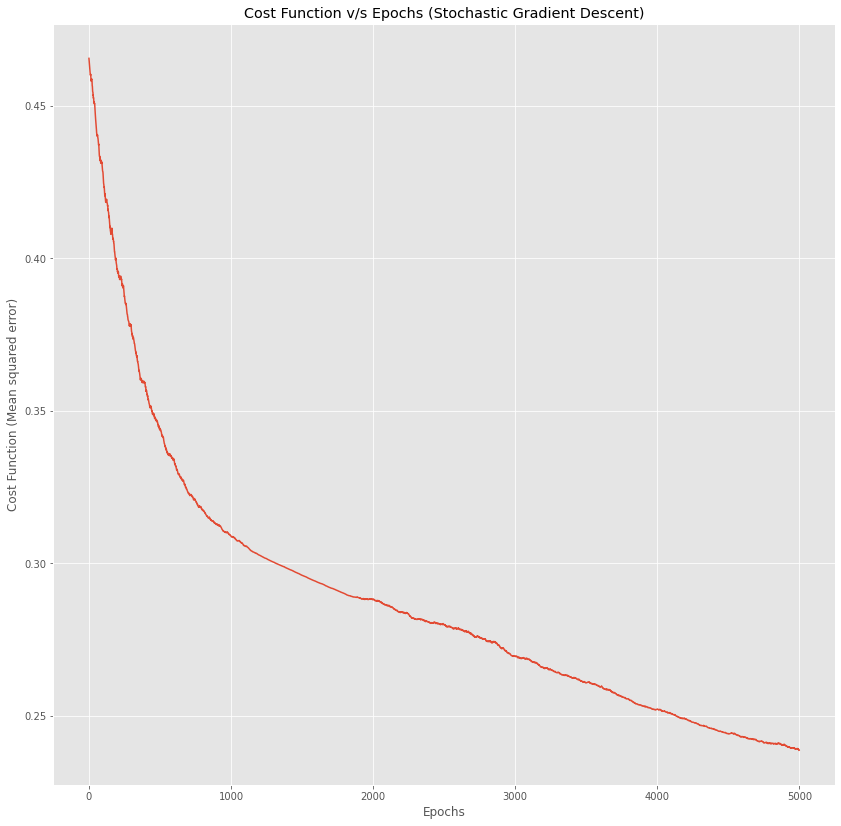

In [ ]:
plot_costs_SGD_L2(costs_SGD_L2)

### L2-norm regularization (Ridge regression) approach using MBGD

In [ ]:
# value predicted from current weights
def pred_MBGD_L2(x, w):
  return (np.dot(x,w))

In [ ]:
# cost/loss function
def cost_MBGD_L2(y, x, w):
  pred_val = pred_MBGD_L2(x,w)
  val = np.sum((pred_val-y)**2)
  return val/(2*(x.shape[0]))

In [ ]:
# weight updation 
def update_MBGD_L2(x, y, w, alpha = 0.001, lambd = 0.05, batch_size = 8):

  idx = np.random.randint(0,x.shape[0], size=batch_size)
  w = w - alpha*(np.sum((pred_MBGD_L2(x[idx],w)-y[idx]).dot(x[idx])))/(x.shape[0]) 

  return w


In [ ]:
def MSE(X, Y, W):
  return (np.square((pred_MBGD_L2(X, W) - Y))).mean() 

In [ ]:
def MAE(X, Y, W):
  return (np.abs((pred_MBGD_L2(X, W) - Y))).mean()

In [ ]:
def CC(X, Y, W):
  Y_pred = pred_MBGD_L2(X, W)
  num = np.mean((Y_pred - np.mean(Y_pred))*(Y - np.mean(Y)))
  den = np.sqrt((np.mean(np.square(Y_pred-np.mean(Y_pred))))*(np.mean(np.square(Y-np.mean(Y)))))
  return num/den

In [ ]:
# Batch Gradient Function
def MBGD_L2(filename):
  datasetQ2 = pd.read_excel(filename) # dataset for Q2
  # shuffling the data for performing hold-out cross-validation
  df = datasetQ2.sample(frac=1).reset_index(drop=True)
  df_training = df[:70]
  df_validation = df[70:80]
  df_testing = df[80:]

  X_train = (np.array([np.ones(len(df_training)),df_training['Feat1'], df_training['Feat2'], df_training['Feat3'], df_training['Feat4']])).T # Extracting the X vector from the dataset 
  Y_train = (np.array(df_training['Output'])).T # Extracting the Y vector

  X_validation = (np.array([np.ones(len(df_validation)),df_validation['Feat1'], df_validation['Feat2'], df_validation['Feat3'], df_validation['Feat4']])).T # Extracting the X vector from the dataset 
  Y_validation = (np.array(df_validation['Output'])).T # Extracting the Y vector

  X_testing = (np.array([np.ones(len(df_testing)),df_testing['Feat1'], df_testing['Feat2'], df_testing['Feat3'], df_testing['Feat4']])).T # Extracting the X vector from the dataset 
  Y_testing = (np.array(df_testing['Output'])).T # Extracting the Y vector

  
  
  # randomizing intial values of the weights
  W = (np.random.randn((X_train.shape)[1])).T

  ALPHA = 0.01 # declaring the learning rate 

  costs = [] # to save the cost value for each epoch

  EPOCH = 5000
  for iteration in range(EPOCH):
    costs.append(cost_MBGD_L2(Y_train,X_train,W))
    W = update_MBGD_L2(X_train,Y_train,W)
  
  print("Evaluation for Training Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_train,Y_train,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_train,Y_train,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_train,Y_train,W)))
  print("----------------------------")

  print("Evaluation for Testing Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_testing,Y_testing,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_testing,Y_testing,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_testing,Y_testing,W)))
  print("----------------------------")

  print("Evaluation for Validation Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_validation,Y_validation,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_validation,Y_validation,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_validation,Y_validation,W)))
  print("----------------------------")
  
  # returns the log of values of the cost, and the weights for each iteration as well as the Weight Matrix
  return costs, W 

In [ ]:
# Plotting the Cost Function v/s Epochs
def plot_costs_MBGD_L2(costs):
  plt.plot(costs)
  plt.xlabel('Epochs')
  plt.ylabel('Cost Function (Mean squared error)')
  plt.title('Cost Function v/s Epochs (Mini Batch Gradient Descent)')

### Output


In [ ]:
costs_MBGD_L2, W_MBGD_L2  = MBGD_L2('data_q2_q3.xlsx')

Evaluation for Training Data
----------------------------
Mean Sqaured Error (MSE): 0.2901098650594508
Mean Absolute Error (MAE): 0.2901098650594508
Correlation Coefficent (CC): 0.2792600733377913
----------------------------
Evaluation for Testing Data
----------------------------
Mean Sqaured Error (MSE): 0.384614582138772
Mean Absolute Error (MAE): 0.384614582138772
Correlation Coefficent (CC): 0.24300610717597484
----------------------------
Evaluation for Validation Data
----------------------------
Mean Sqaured Error (MSE): 0.28289154239874487
Mean Absolute Error (MAE): 0.28289154239874487
Correlation Coefficent (CC): 0.11379856761954715
----------------------------


In [ ]:
for val in range(len(W_MBGD_L2)):
  print('W{0}: {1}'.format(val, W_MBGD_L2[val]))

W0: -0.966042816354239
W1: -0.25109253214975913
W2: 0.2228338200251055
W3: -0.046881645710288807
W4: 0.6421310494216147


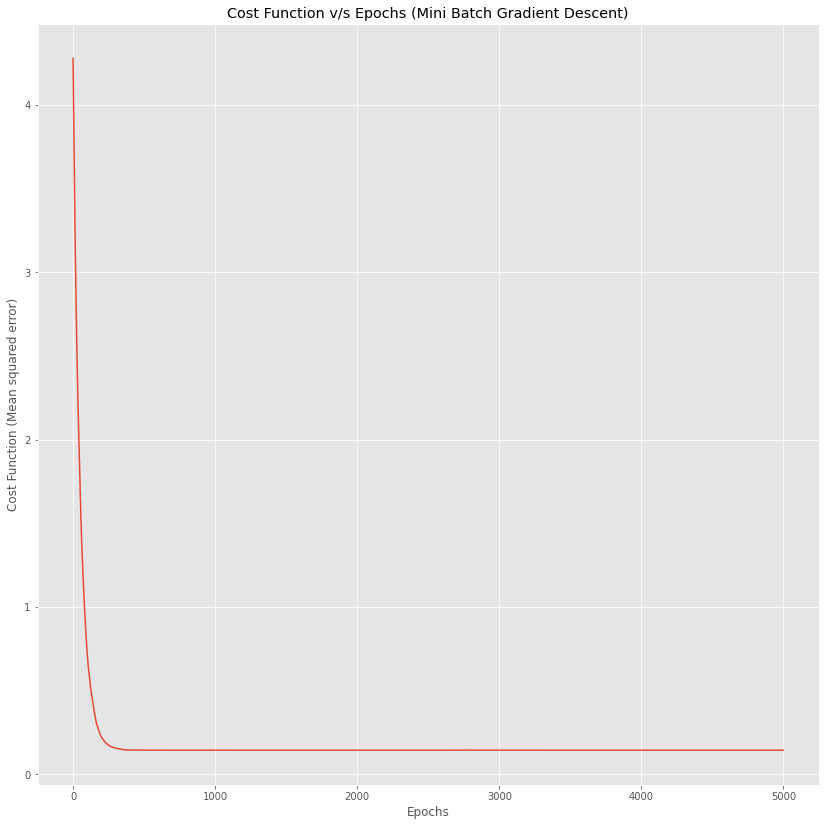

In [ ]:
plot_costs_MBGD_L2(costs_MBGD_L2)

#Q3
Repeat question no. Q2 using least angle regression models with BGD, SGD, and
MBGD algorithms. Evaluate MSE, MAE, and CC values for the test data. You can use
grid search to evaluate the optimal parameters of the models. You can divide the
dataset into training, validation, and testing using hold-out cross-validation (70% (training), 10% (validation), and 20% (testing)). For Q3, the data_q2_q3.xlsx file must be used.


### L1-norm regularization (Least angle regression) approach using BGD

In [ ]:
# value predicted from current weights
def pred_BGD_L1(x, w):
  return (np.dot(x,w))

In [ ]:
# cost/loss function
def cost_BGD_L1(y, x, w):
  pred_val = pred_BGD_L1(x,w)
  val = np.sum((pred_val-y)**2)
  return val/(2*(x.shape[0]))

In [ ]:
# weight updation 
def update_BGD_L1(x, y, w, alpha = 0.001, lambd = 0.005):
  w = w - alpha*(np.sum((pred_BGD_L1(x,w)-y).dot(x)))/(x.shape[0]) - (alpha*lambd)*w
  return w

In [ ]:
def MSE(X, Y, W):
  return (np.square((pred_BGD_L1(X, W) - Y))).mean() 

In [ ]:
def MAE(X, Y, W):
  return (np.abs((pred_BGD_L1(X, W) - Y))).mean()

In [ ]:
def CC(X, Y, W):
  Y_pred = pred_BGD_L1(X, W)
  num = np.mean((Y_pred - np.mean(Y_pred))*(Y - np.mean(Y)))
  den = np.sqrt((np.mean(np.square(Y_pred-np.mean(Y_pred))))*(np.mean(np.square(Y-np.mean(Y)))))
  return num/den

In [ ]:
# Batch Gradient Function
def BGD_L1(filename):
  datasetQ2 = pd.read_excel(filename) # dataset for Q2
  # shuffling the data for performing hold-out cross-validation
  df = datasetQ2.sample(frac=1).reset_index(drop=True)
  df_training = df[:70]
  df_validation = df[70:80]
  df_testing = df[80:]

  X_train = (np.array([np.ones(len(df_training)),df_training['Feat1'], df_training['Feat2'], df_training['Feat3'], df_training['Feat4']])).T # Extracting the X vector from the dataset 
  Y_train = (np.array(df_training['Output'])).T # Extracting the Y vector

  X_validation = (np.array([np.ones(len(df_validation)),df_validation['Feat1'], df_validation['Feat2'], df_validation['Feat3'], df_validation['Feat4']])).T # Extracting the X vector from the dataset 
  Y_validation = (np.array(df_validation['Output'])).T # Extracting the Y vector

  X_testing = (np.array([np.ones(len(df_testing)),df_testing['Feat1'], df_testing['Feat2'], df_testing['Feat3'], df_testing['Feat4']])).T # Extracting the X vector from the dataset 
  Y_testing = (np.array(df_testing['Output'])).T # Extracting the Y vector

  
  
  # randomizing intial values of the weights
  W = (np.random.randn((X_train.shape)[1])).T

  ALPHA = 0.001 # declaring the learning rate 

  costs = [] # to save the cost value for each epoch

  EPOCH = 500
  for iteration in range(EPOCH):
    costs.append(cost_BGD_L1(Y_train,X_train,W))
    W = update_BGD_L1(X_train,Y_train,W)
  
  print("Evaluation for Training Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_train,Y_train,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_train,Y_train,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_train,Y_train,W)))

  print("Evaluation for Testing Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_testing,Y_testing,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_testing,Y_testing,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_testing,Y_testing,W)))

  print("Evaluation for Validation Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_validation,Y_validation,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_validation,Y_validation,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_validation,Y_validation,W)))

  
  # returns the log of values of the cost, and the weights for each iteration as well as the Weight Matrix
  return costs, W 

In [ ]:
# Plotting the Cost Function v/s Epochs
def plot_costs_BGD_L1(costs):
  plt.plot(costs)
  plt.xlabel('Epochs')
  plt.ylabel('Cost Function (Mean squared error)')
  plt.title('Cost Function v/s Epochs (Batch Gradient Descent - L1 Regularization) ')

## Output

In [ ]:
costs_BGD_L1, W_BGD_L1  = BGD_L1('data_q2_q3.xlsx')

Evaluation for Training Data
----------------------------
Mean Sqaured Error (MSE): 0.3537669286262443
Mean Absolute Error (MAE): 0.3537669286262443
Correlation Coefficent (CC): 0.015118797987014572
Evaluation for Testing Data
----------------------------
Mean Sqaured Error (MSE): 0.2107765233469535
Mean Absolute Error (MAE): 0.2107765233469535
Correlation Coefficent (CC): 0.19315517482999103
Evaluation for Validation Data
----------------------------
Mean Sqaured Error (MSE): 0.26618096262886815
Mean Absolute Error (MAE): 0.26618096262886815
Correlation Coefficent (CC): 0.1154819276185432


In [ ]:
for val in range(len(W_BGD_L1)):
  print('W{0}: {1}'.format(val, W_BGD_L1[val]))

W0: 0.7525779152627193
W1: -0.7491947335594304
W2: 0.3319576089697603
W3: -0.04878860020465643
W4: 0.28453118926535464


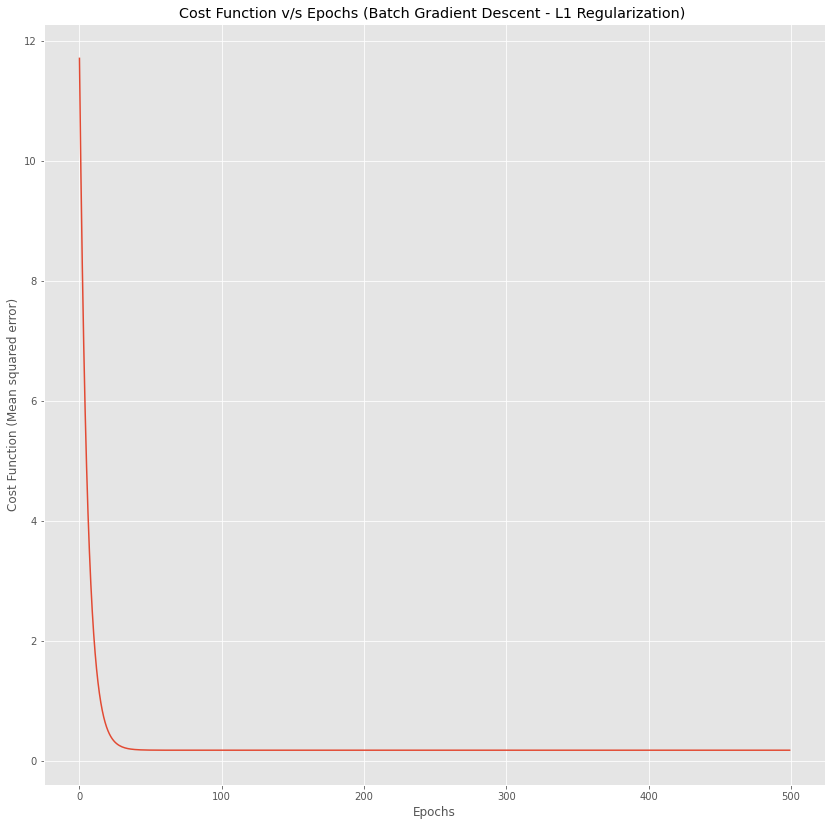

In [ ]:
plot_costs_BGD_L1(costs_BGD_L1)

### L1-norm regularization (Least angle regression) approach using SGD

In [ ]:
# value predicted from current weights
def pred_SGD_L1(x, w):
  return (np.dot(x,w))

In [ ]:
# cost/loss function
def cost_SGD_L1(y, x, w):
  pred_val = pred_SGD_L1(x,w)
  val = np.sum((pred_val-y)**2)
  return val/(2*(x.shape[0]))

In [ ]:
# weight updation 
def update_SGD_L1(x, y, w, alpha = 0.001, lambd = 0.05):

  idx = np.random.randint(0,x.shape[0])
  w = w - alpha*(np.sum((pred_SGD_L1(x[idx],w)-y[idx])*(x[idx])))/(x.shape[0]) - (alpha*lambd)*w
  return w


In [ ]:
def MSE(X, Y, W):
  return (np.square((pred_SGD_L1(X, W) - Y))).mean() 

In [ ]:
def MAE(X, Y, W):
  return (np.abs((pred_SGD_L1(X, W) - Y))).mean()

In [ ]:
def CC(X, Y, W):
  Y_pred = pred_SGD_L1(X, W)
  num = np.mean((Y_pred - np.mean(Y_pred))*(Y - np.mean(Y)))
  den = np.sqrt((np.mean(np.square(Y_pred-np.mean(Y_pred))))*(np.mean(np.square(Y-np.mean(Y)))))
  return num/den

In [ ]:
# Batch Gradient Function
def SGD_L1(filename):
  datasetQ2 = pd.read_excel(filename) # dataset for Q2
  # shuffling the data for performing hold-out cross-validation
  df = datasetQ2.sample(frac=1).reset_index(drop=True)
  df_training = df[:70]
  df_validation = df[70:80]
  df_testing = df[80:]

  X_train = (np.array([np.ones(len(df_training)),df_training['Feat1'], df_training['Feat2'], df_training['Feat3'], df_training['Feat4']])).T # Extracting the X vector from the dataset 
  Y_train = (np.array(df_training['Output'])).T # Extracting the Y vector

  X_validation = (np.array([np.ones(len(df_validation)),df_validation['Feat1'], df_validation['Feat2'], df_validation['Feat3'], df_validation['Feat4']])).T # Extracting the X vector from the dataset 
  Y_validation = (np.array(df_validation['Output'])).T # Extracting the Y vector

  X_testing = (np.array([np.ones(len(df_testing)),df_testing['Feat1'], df_testing['Feat2'], df_testing['Feat3'], df_testing['Feat4']])).T # Extracting the X vector from the dataset 
  Y_testing = (np.array(df_testing['Output'])).T # Extracting the Y vector

  
  
  # randomizing intial values of the weights
  W = (np.random.randn((X_train.shape)[1])).T

  ALPHA = 0.01 # declaring the learning rate 

  costs = [] # to save the cost value for each epoch

  EPOCH = 5000
  for iteration in range(EPOCH):
    costs.append(cost_SGD_L1(Y_train,X_train,W))
    W = update_SGD_L1(X_train,Y_train,W)
  
  print("Evaluation for Training Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_train,Y_train,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_train,Y_train,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_train,Y_train,W)))

  print("Evaluation for Testing Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_testing,Y_testing,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_testing,Y_testing,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_testing,Y_testing,W)))

  print("Evaluation for Validation Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_validation,Y_validation,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_validation,Y_validation,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_validation,Y_validation,W)))

  
  # returns the log of values of the cost, and the weights for each iteration as well as the Weight Matrix
  return costs, W 

In [ ]:
# Plotting the Cost Function v/s Epochs
def plot_costs_SGD_L1(costs):
  plt.plot(costs)
  plt.xlabel('Epochs')
  plt.ylabel('Cost Function (Mean squared error)')
  plt.title('Cost Function v/s Epochs (Stochastic Gradient Descent)')

## Output


In [ ]:
costs_SGD_L1, W_SGD_L1  = SGD_L1('data_q2_q3.xlsx')

Evaluation for Training Data
----------------------------
Mean Sqaured Error (MSE): 0.34019834723826964
Mean Absolute Error (MAE): 0.34019834723826964
Correlation Coefficent (CC): 0.19239502138854445
Evaluation for Testing Data
----------------------------
Mean Sqaured Error (MSE): 0.2740091968177543
Mean Absolute Error (MAE): 0.2740091968177543
Correlation Coefficent (CC): 0.29166664512067725
Evaluation for Validation Data
----------------------------
Mean Sqaured Error (MSE): 0.45378559548979813
Mean Absolute Error (MAE): 0.45378559548979813
Correlation Coefficent (CC): -0.04111134971726688


In [ ]:
for val in range(len(W_SGD_L1)):
  print('W{0}: {1}'.format(val, W_SGD_L1[val]))

W0: -0.8920440451432711
W1: -0.7366351305587308
W2: 0.4050427002574002
W3: 0.011962293865159273
W4: 0.5775941249960369


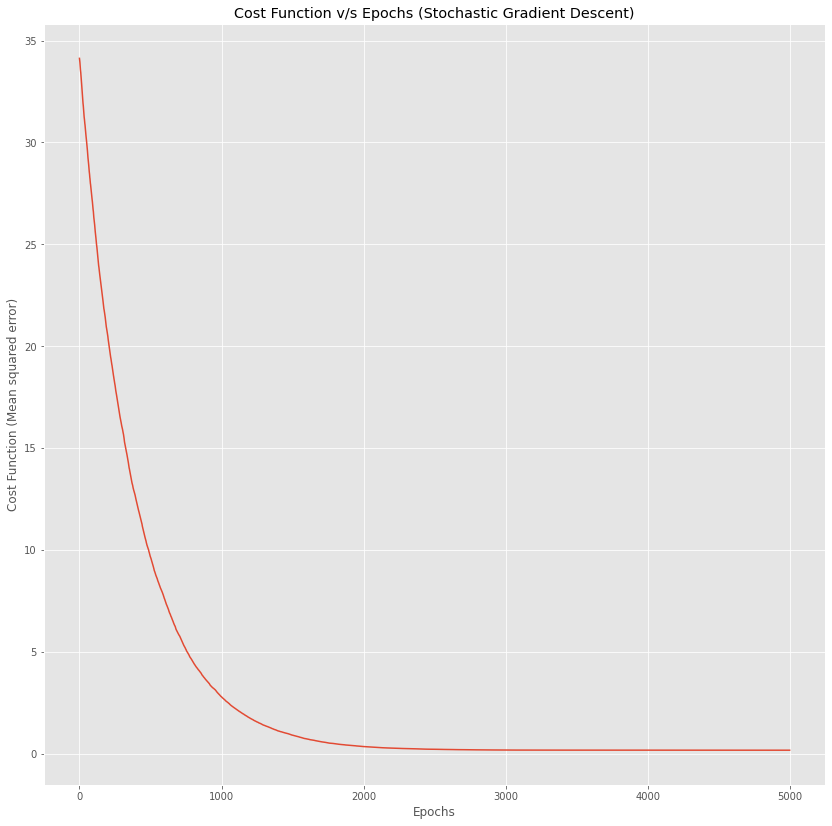

In [ ]:
plot_costs_SGD_L1(costs_SGD_L1)

### L1-norm regularization (Least angle regression) approach using MBGD

In [ ]:
# value predicted from current weights
def pred_MBGD_L1(x, w):
  return (np.dot(x,w))

In [ ]:
# cost/loss function
def cost_MBGD_L1(y, x, w):
  pred_val = pred_MBGD_L1(x,w)
  val = np.sum((pred_val-y)**2)
  return val/(2*(x.shape[0]))

In [ ]:
# weight updation 
def update_MBGD_L1(x, y, w, alpha = 0.001, lambd = 0.005, batch_size = 8):

  idx = np.random.randint(0,x.shape[0], size=batch_size)
  w = w - alpha*(np.sum((pred_MBGD_L1(x[idx],w)-y[idx]).dot(x[idx])))/(x.shape[0]) 

  return w


In [ ]:
def MSE(X, Y, W):
  return (np.square((pred_MBGD_L1(X, W) - Y))).mean() 

In [ ]:
def MAE(X, Y, W):
  return (np.abs((pred_MBGD_L1(X, W) - Y))).mean()

In [ ]:
def CC(X, Y, W):
  Y_pred = pred_MBGD_L1(X, W)
  num = np.mean((Y_pred - np.mean(Y_pred))*(Y - np.mean(Y)))
  den = np.sqrt((np.mean(np.square(Y_pred-np.mean(Y_pred))))*(np.mean(np.square(Y-np.mean(Y)))))
  return num/den

In [ ]:
# Batch Gradient Function
def MBGD_L1(filename):
  datasetQ2 = pd.read_excel(filename) # dataset for Q2
  # shuffling the data for performing hold-out cross-validation
  df = datasetQ2.sample(frac=1).reset_index(drop=True)
  df_training = df[:70]
  df_validation = df[70:80]
  df_testing = df[80:]

  X_train = (np.array([np.ones(len(df_training)),df_training['Feat1'], df_training['Feat2'], df_training['Feat3'], df_training['Feat4']])).T # Extracting the X vector from the dataset 
  Y_train = (np.array(df_training['Output'])).T # Extracting the Y vector

  X_validation = (np.array([np.ones(len(df_validation)),df_validation['Feat1'], df_validation['Feat2'], df_validation['Feat3'], df_validation['Feat4']])).T # Extracting the X vector from the dataset 
  Y_validation = (np.array(df_validation['Output'])).T # Extracting the Y vector

  X_testing = (np.array([np.ones(len(df_testing)),df_testing['Feat1'], df_testing['Feat2'], df_testing['Feat3'], df_testing['Feat4']])).T # Extracting the X vector from the dataset 
  Y_testing = (np.array(df_testing['Output'])).T # Extracting the Y vector

  
  
  # randomizing intial values of the weights
  W = (np.random.randn((X_train.shape)[1])).T

  ALPHA = 0.01 # declaring the learning rate 

  costs = [] # to save the cost value for each epoch

  EPOCH = 5000
  for iteration in range(EPOCH):
    costs.append(cost_MBGD_L1(Y_train,X_train,W))
    W = update_MBGD_L1(X_train,Y_train,W)
  
  print("Evaluation for Training Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_train,Y_train,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_train,Y_train,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_train,Y_train,W)))
  print("----------------------------")

  print("Evaluation for Testing Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_testing,Y_testing,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_testing,Y_testing,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_testing,Y_testing,W)))
  print("----------------------------")

  print("Evaluation for Validation Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_validation,Y_validation,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_validation,Y_validation,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_validation,Y_validation,W)))
  print("----------------------------")
  
  # returns the log of values of the cost, and the weights for each iteration as well as the Weight Matrix
  return costs, W 

In [ ]:
# Plotting the Cost Function v/s Epochs
def plot_costs_MBGD_L1(costs):
  plt.plot(costs)
  plt.xlabel('Epochs')
  plt.ylabel('Cost Function (Mean squared error)')
  plt.title('Cost Function v/s Epochs (Mini Batch Gradient Descent)')

### Output


In [ ]:
costs_MBGD_L1, W_MBGD_L1  = MBGD_L1('data_q2_q3.xlsx')

Evaluation for Training Data
----------------------------
Mean Sqaured Error (MSE): 0.2911655477508776
Mean Absolute Error (MAE): 0.2911655477508776
Correlation Coefficent (CC): 0.2648299229153375
----------------------------
Evaluation for Testing Data
----------------------------
Mean Sqaured Error (MSE): 0.24415825316829362
Mean Absolute Error (MAE): 0.24415825316829362
Correlation Coefficent (CC): 0.1824181686160726
----------------------------
Evaluation for Validation Data
----------------------------
Mean Sqaured Error (MSE): 0.17066784431375898
Mean Absolute Error (MAE): 0.17066784431375898
Correlation Coefficent (CC): 0.6204837203746507
----------------------------


In [ ]:
for val in range(len(W_MBGD_L1)):
  print('W{0}: {1}'.format(val, W_MBGD_L1[val]))

W0: 1.5174034797623035
W1: 0.942944453089206
W2: -0.48269422768896597
W3: 0.12545839872101822
W4: -0.032290855970431694


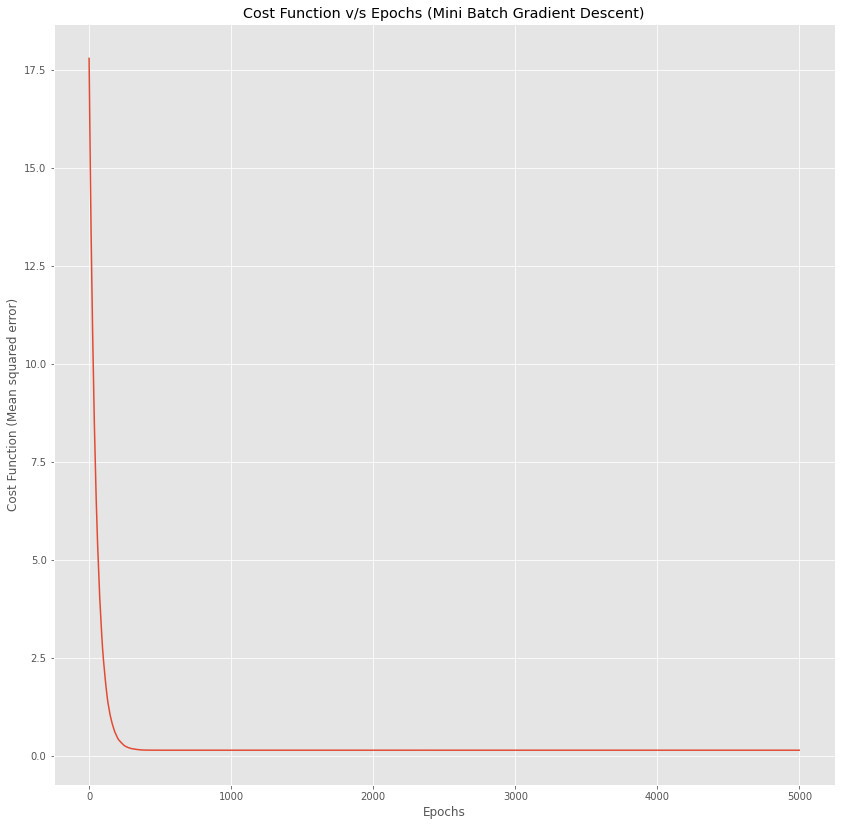

In [ ]:
plot_costs_MBGD_L1(costs_MBGD_L1)

# Q4
Implement logistic regression (LOR), LOR with L2-norm regularization, and LOR
with L1-norm regularization models using BGD, SGD, and MBGD algorithms. The
dataset in data_q4_q5.xlsx contains 30 features and one output. The class label ‘M’ stands for malignant, and ‘B’ is the Benign class. You must use hold-out
cross-validation ((CV) with 70% as training, 10% as validation and 20% as testing) to evaluate training, validation, and testing instances for each model. Evaluate the performance of each model using accuracy, sensitivity, and specificity measures.

In [128]:
def sigmoid(z):
  z = z.astype('float')
  val = 1/(1 + np.exp(-z))
  return val

In [127]:
def metrics(Y_true, Y_pred):
    FP=0 # For counting the False Positives
    FN=0 # For counting the False Negatives
    TN=0 # For counting the True Negatives
    TP=0 # For counting the True Positives

    for i in range(len(Y_true)):
      if Y_true[i]==1:
        if Y_pred[i]==1:
          TP+=1
        else:
          FN+=1
      else:
        if Y_pred[i]==0:
          TN+=1
        else:
          FP+=1

    print('--------------------------------------------------------------------------------')
  
    print("False Positives : ", FP)
    print("False Negatives : ", FN)
    print("True Negatives  : ", TN)
    print("True Positives  : ", TP)

    print('--------------------------------------------------------------------------------')

    sens= TP/(TP+FN)
    spes = TN/(TN+FP)

    print("Sensitivity : ", sens)
    print("Specificity : ", spes)
    print("Accuracy ((TN+TP)/(TN+TP+FN+FP)) : ", ((TP+TN)/(TN+FN+TP+FP)))
    print('--------------------------------------------------------------------------------')



In [124]:
def predictLORL1(X,W, threshold = 0.5):
	Z = X.dot(W)
	y_prob = sigmoid(Z)
	y_prob = [1 if y>=threshold else 0 for y in y_prob]
	return y_prob


### Logistic Regression using L1-norm & L2-norm regularization approach & BGD

In [123]:
def costFunctionLORL2(Y, Y_pred, W, lambd): 
  cost =  - Y*np.log(Y_pred)- (1-Y)*(np.log(1-Y_pred)) - (lambd/2)*(np.sum(W**2))
  return cost

In [122]:
def costFunctionLORL1(Y, Y_pred, W, lambd): 
  cost =  - Y*np.log(Y_pred)- (1-Y)*(np.log(1-Y_pred)) - (lambd/2)*(np.sum(np.abs(W)))
  return cost

In [116]:
def normalize(data):
  normalized_vec = data

  if(len(data.shape) == 1):
    mean = np.mean(data[:])
    std_dev = np.std(data[:])
    normalized_vec[:] = (normalized_vec[:] - mean)/std_dev
  else:
    for i in range(1,data.shape[1]):
      mean = np.mean(data[:, i])
      std_dev = np.std(data[:, i])
      normalized_vec[:,i] = (normalized_vec[:,i] - mean)/std_dev
  
  return normalized_vec

In [125]:
def LOR_L2(filename, epoch = 200, alpha = 0.1, lambd = 0.0005):
  # reading the data
  data = pd.read_excel(filename)

  # shuffling the enteries for better spliting
  df = data.sample(frac=1).reset_index(drop=True)

  # encoding the data
  for i in range(len(df)):
    if(df['diagnosis'][i] == 'B'):
      df['diagnosis'][i] = 0
    elif(df['diagnosis'][i] == 'M'):
      df['diagnosis'][i] = 1


  # spliting the data (70-20-10 : validing, testing, validation)
  train_val = int(0.7*len(df))
  test_val = int(0.2*len(df))
  valid_val = int(0.1*len(df))
  
  print('--------------------------------------------')
  print("Length of Training sets: {0}, Testing sets: {1}, and Valdiation sets: {2} ".format(train_val, test_val, valid_val))
  print('--------------------------------------------')


  df_training = df[:train_val]
  df_validation = df[train_val:train_val+valid_val]
  df_testing = df[train_val+valid_val:]

  df_training.insert(0, 'ones', 1)
  df_validation.insert(0, 'ones', 1)
  df_testing.insert(0, 'ones', 1)

  # converting to numpy array
  df_train = df_training.to_numpy()
  df_valid = df_validation.to_numpy()
  df_test = df_testing.to_numpy()

  # obtaining the data 
  X_train = df_train[:,:(df_train.shape)[1] - 1]
  Y_train = df_train[:,df_train.shape[1]-1]

  X_valid = df_valid[:,:(df_valid.shape)[1] - 1]
  Y_valid = df_valid[:,df_valid.shape[1]-1]

  X_test = df_test[:,:(df_test.shape)[1] - 1]
  Y_test = df_test[:,df_test.shape[1]-1]



  # normalizing data
  XVec = normalize(X_train)
  YVec = Y_train

  # initalizing weights
  W = (np.random.randn((XVec.shape)[1])).T

  costs = [] # for recording the cost function

  for i in range(epoch):
    Z = XVec.dot(W)
    Y_prob = sigmoid(Z)

    cost = costFunctionLORL2(YVec, Y_prob, W, lambd)
    loss = np.mean(cost)
    costs.append(loss)

    W = W - alpha*np.mean(((Y_prob - YVec).reshape(YVec.shape[0],1))*XVec, axis=0) - alpha*lambd*W

    print('EPOCH : {}  &  LOSS : {}'.format(i, loss))

  print('--------------------------------------------')

  Y_pred_train = predictLORL1(XVec, W)
  Y_pred_test = predictLORL1(normalize(X_test), W)
  Y_pred_valid = predictLORL1(normalize(X_valid), W)
  
  print("Metrics measured for training data")
  metrics(Y_train, Y_pred_train)
  print("Metrics measured for testing data")
  metrics(Y_test, Y_pred_test)
  print("Metrics measured for validation data")
  metrics(Y_valid, Y_valid)

  
  return W, costs, Y_pred_train


In [ ]:
def LOR_L1(filename, epoch = 200, alpha = 0.1, lambd = 0.0005):
  # reading the data
  data = pd.read_excel(filename)

  # shuffling the enteries for better spliting
  df = data.sample(frac=1).reset_index(drop=True)

  # encoding the data
  for i in range(len(df)):
    if(df['diagnosis'][i] == 'B'):
      df['diagnosis'][i] = 0
    elif(df['diagnosis'][i] == 'M'):
      df['diagnosis'][i] = 1


  # spliting the data (70-20-10 : validing, testing, validation)
  train_val = int(0.7*len(df))
  test_val = int(0.2*len(df))
  valid_val = int(0.1*len(df))
  
  print('--------------------------------------------')
  print("Length of Training sets: {0}, Testing sets: {1}, and Valdiation sets: {2} ".format(train_val, test_val, valid_val))
  print('--------------------------------------------')


  df_training = df[:train_val]
  df_validation = df[train_val:train_val+valid_val]
  df_testing = df[train_val+valid_val:]

  df_training.insert(0, 'ones', 1)
  df_validation.insert(0, 'ones', 1)
  df_testing.insert(0, 'ones', 1)

  # converting to numpy array
  df_train = df_training.to_numpy()
  df_valid = df_validation.to_numpy()
  df_test = df_testing.to_numpy()

  # obtaining the data 
  X_train = df_train[:,:(df_train.shape)[1] - 1]
  Y_train = df_train[:,df_train.shape[1]-1]

  X_valid = df_valid[:,:(df_valid.shape)[1] - 1]
  Y_valid = df_valid[:,df_valid.shape[1]-1]

  X_test = df_test[:,:(df_test.shape)[1] - 1]
  Y_test = df_test[:,df_test.shape[1]-1]



  # normalizing data
  XVec = normalize(X_train)
  YVec = Y_train

  # initalizing weights
  W = (np.random.randn((XVec.shape)[1])).T

  costs = [] # for recording the cost function

  for i in range(epoch):
    Z = XVec.dot(W)
    Y_prob = sigmoid(Z)

    cost = costFunctionLORL1(YVec, Y_prob, W, lambd)
    loss = np.mean(cost)
    costs.append(loss)

    W = W - alpha*np.mean(((Y_prob - YVec).reshape(YVec.shape[0],1))*XVec, axis=0) - alpha*lambd*np.sign(W) # using L1 norm

    print('EPOCH : {}  &  LOSS : {}'.format(i, loss))

  print('--------------------------------------------')

  Y_pred_train = predictLORL1(XVec, W)
  Y_pred_test = predictLORL1(normalize(X_test), W)
  Y_pred_valid = predictLORL1(normalize(X_valid), W)
  
  print("Metrics measured for training data")
  metrics(Y_train, Y_pred_train)
  print("Metrics measured for testing data")
  metrics(Y_test, Y_pred_test)
  print("Metrics measured for validation data")
  metrics(Y_valid, Y_valid)

  
  return W, costs, Y_pred_train

In [ ]:
# Plotting the Cost Function v/s Epochs
def plot_costs_lor_L2(costs):
  plt.plot(costs)
  plt.xlabel('Epochs')
  plt.ylabel('Cost Function')
  plt.title('Cost Function v/s Epochs (Batch Gradient Descent)')

In [ ]:
# Plotting the Cost Function v/s Epochs
def plot_costs_lor_L1(costs):
  plt.plot(costs)
  plt.xlabel('Epochs')
  plt.ylabel('Cost Function')
  plt.title('Cost Function v/s Epochs (Batch Gradient Descent) - L1 Regularization')

## Output

In [ ]:
W_LOR_L2, costs_LOR_L2, Y_pred_LOR_L2 = LOR_L2(filename='data_q4_q5.xlsx')

--------------------------------------------
Length of Training sets: 398, Testing sets: 113, and Valdiation sets: 56 
--------------------------------------------
EPOCH : 0  &  LOSS : 4.7033198548232305
EPOCH : 1  &  LOSS : 4.014363860186594
EPOCH : 2  &  LOSS : 3.367451197344821
EPOCH : 3  &  LOSS : 2.778391322224374
EPOCH : 4  &  LOSS : 2.2636260335288516
EPOCH : 5  &  LOSS : 1.830889423129982
EPOCH : 6  &  LOSS : 1.486758182402907
EPOCH : 7  &  LOSS : 1.230268011432356
EPOCH : 8  &  LOSS : 1.0421863622559517
EPOCH : 9  &  LOSS : 0.8997695158800022
EPOCH : 10  &  LOSS : 0.789164746475629
EPOCH : 11  &  LOSS : 0.7022128894539544
EPOCH : 12  &  LOSS : 0.6331781213081241
EPOCH : 13  &  LOSS : 0.5774812146235702
EPOCH : 14  &  LOSS : 0.5317409518317702
EPOCH : 15  &  LOSS : 0.4936007987388552
EPOCH : 16  &  LOSS : 0.4613853406581965
EPOCH : 17  &  LOSS : 0.43386228065572957
EPOCH : 18  &  LOSS : 0.41010421388646684
EPOCH : 19  &  LOSS : 0.38940327048285106
EPOCH : 20  &  LOSS : 0.371213

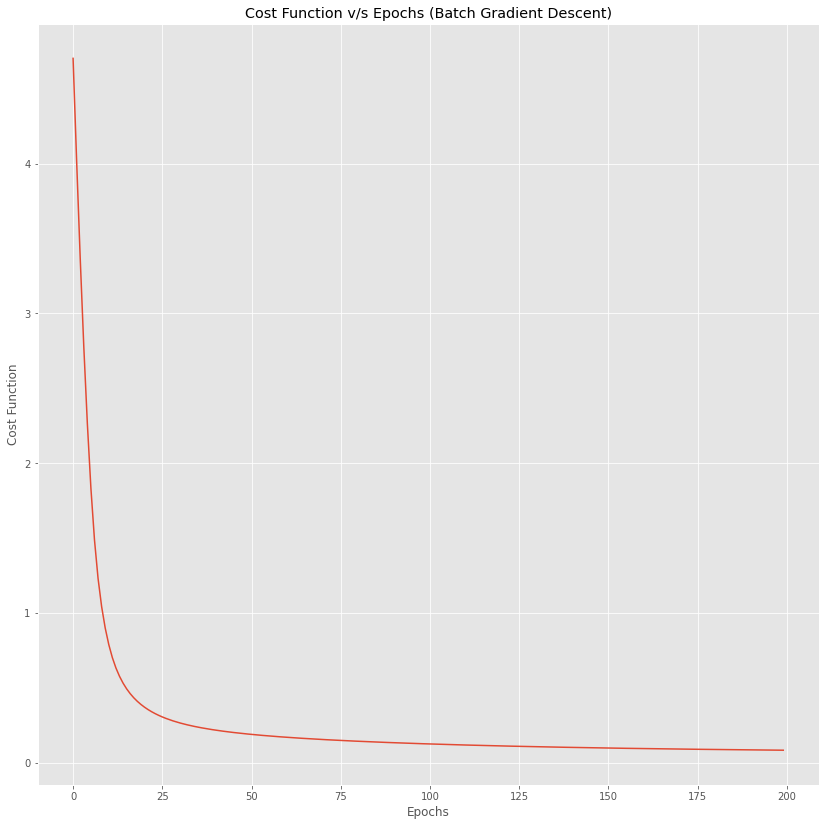

In [ ]:
plot_costs_lor_L2(costs=costs_LOR_L2)

In [ ]:
W_LOR_L1, costs_LOR_L1, Y_pred_LOR_L1 = LOR_L1(filename='data_q4_q5.xlsx')

--------------------------------------------
Length of Training sets: 398, Testing sets: 113, and Valdiation sets: 56 
--------------------------------------------
EPOCH : 0  &  LOSS : 2.813536372570219
EPOCH : 1  &  LOSS : 2.3234288373604772
EPOCH : 2  &  LOSS : 1.9078163761089362
EPOCH : 3  &  LOSS : 1.5697255634700207
EPOCH : 4  &  LOSS : 1.3068917591408673
EPOCH : 5  &  LOSS : 1.1077252032843168
EPOCH : 6  &  LOSS : 0.954572500669002
EPOCH : 7  &  LOSS : 0.835327566748748
EPOCH : 8  &  LOSS : 0.7409287800678803
EPOCH : 9  &  LOSS : 0.6646229519453029
EPOCH : 10  &  LOSS : 0.6018790557872471
EPOCH : 11  &  LOSS : 0.5495965275561934
EPOCH : 12  &  LOSS : 0.5055510768614476
EPOCH : 13  &  LOSS : 0.46808194606337394
EPOCH : 14  &  LOSS : 0.43591425961034574
EPOCH : 15  &  LOSS : 0.40803457982369
EPOCH : 16  &  LOSS : 0.3836754519182069
EPOCH : 17  &  LOSS : 0.36221195621968344
EPOCH : 18  &  LOSS : 0.34315840496343497
EPOCH : 19  &  LOSS : 0.3261281355238425
EPOCH : 20  &  LOSS : 0.310

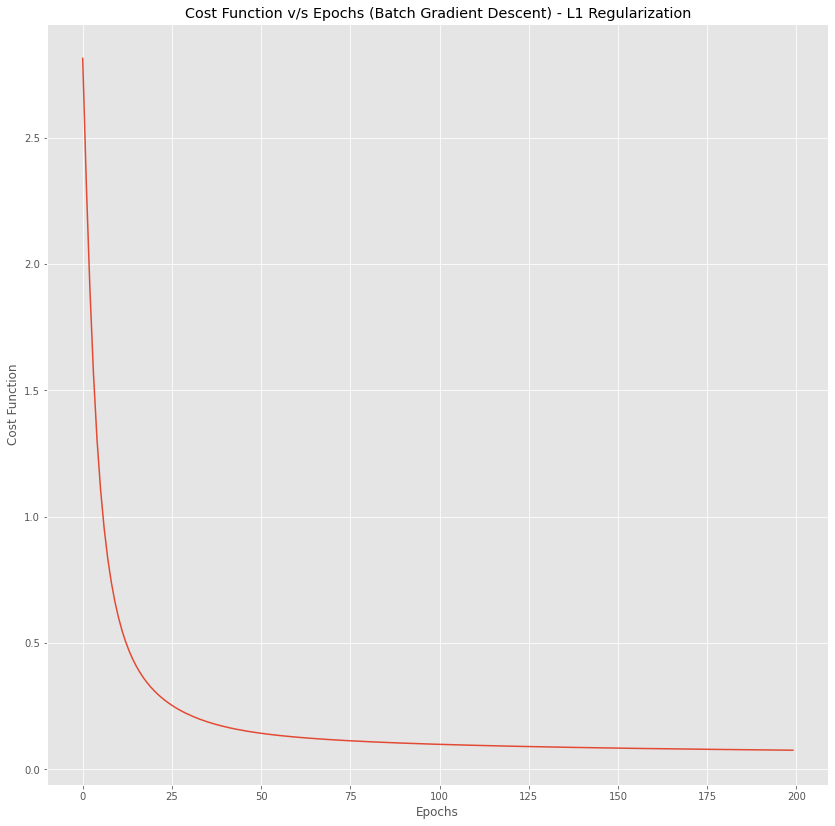

In [ ]:
plot_costs_lor_L1(costs=costs_LOR_L1)

### Logistic Regression using L1-norm & L2-norm regularization approach & SGD

In [ ]:
def LOR_L2_SGD(filename, epoch = 500, alpha = 0.39, lambd = 0.001):
  # reading the data
  data = pd.read_excel(filename)

  # shuffling the enteries for better spliting
  df = data.sample(frac=1).reset_index(drop=True)

  # encoding the data
  for i in range(len(df)):
    if(df['diagnosis'][i] == 'B'):
      df['diagnosis'][i] = 0
    elif(df['diagnosis'][i] == 'M'):
      df['diagnosis'][i] = 1


  # spliting the data (70-20-10 : validing, testing, validation)
  train_val = int(0.7*len(df))
  test_val = int(0.2*len(df))
  valid_val = int(0.1*len(df))
  
  print('------------------------------------------------------------------------------')
  print("Length of Training sets: {0}, Testing sets: {1}, and Valdiation sets: {2} ".format(train_val, test_val, valid_val))
  print('------------------------------------------------------------------------------')


  df_training = df[:train_val]
  df_validation = df[train_val:train_val+valid_val]
  df_testing = df[train_val+valid_val:]

  df_training.insert(0, 'ones', 1)
  df_validation.insert(0, 'ones', 1)
  df_testing.insert(0, 'ones', 1)

  # converting to numpy array
  df_train = df_training.to_numpy()
  df_valid = df_validation.to_numpy()
  df_test = df_testing.to_numpy()

  # obtaining the data 
  X_train = df_train[:,:(df_train.shape)[1] - 1]
  Y_train = df_train[:,df_train.shape[1]-1]

  X_valid = df_valid[:,:(df_valid.shape)[1] - 1]
  Y_valid = df_valid[:,df_valid.shape[1]-1]

  X_test = df_test[:,:(df_test.shape)[1] - 1]
  Y_test = df_test[:,df_test.shape[1]-1]



  # normalizing data
  XVec = normalize(X_train)
  YVec = Y_train

  # initalizing weights
  W = (np.random.randn((XVec.shape)[1])).T

  costs = [] # for recording the cost function

  for i in range(epoch):
    Z = XVec.dot(W)
    Y_prob = sigmoid(Z)

    cost = costFunctionLORL2(YVec, Y_prob, W, lambd)
    loss = np.mean(cost)
    costs.append(loss)

    idx = np.random.randint(0,XVec.shape[0])
    W = W - alpha*np.mean(((Y_prob[idx] - YVec[idx]))*XVec[idx], axis=0) - alpha*lambd*W
    #print('EPOCH : {}  &  LOSS : {}'.format(i, loss))

  print('--------------------------------------------')

  Y_pred_train = predictLORL1(XVec, W)
  Y_pred_test = predictLORL1(normalize(X_test), W)
  Y_pred_valid = predictLORL1(normalize(X_valid), W)
  
  print("Metrics measured for training data")
  metrics(Y_train, Y_pred_train)
  print("Metrics measured for testing data")
  metrics(Y_test, Y_pred_test)
  print("Metrics measured for validation data")
  metrics(Y_valid, Y_valid)

  
  return W, costs, Y_pred_train


In [ ]:
def LOR_L1_SGD(filename, epoch = 200, alpha = 0.3, lambd = 0.005):
  # reading the data
  data = pd.read_excel(filename)

  # shuffling the enteries for better spliting
  df = data.sample(frac=1).reset_index(drop=True)

  # encoding the data
  for i in range(len(df)):
    if(df['diagnosis'][i] == 'B'):
      df['diagnosis'][i] = 0
    elif(df['diagnosis'][i] == 'M'):
      df['diagnosis'][i] = 1


  # spliting the data (70-20-10 : validing, testing, validation)
  train_val = int(0.7*len(df))
  test_val = int(0.2*len(df))
  valid_val = int(0.1*len(df))
  
  print('----------------------------------------------------------------------------')
  print("Length of Training sets: {0}, Testing sets: {1}, and Valdiation sets: {2} ".format(train_val, test_val, valid_val))
  print('----------------------------------------------------------------------------')


  df_training = df[:train_val]
  df_validation = df[train_val:train_val+valid_val]
  df_testing = df[train_val+valid_val:]

  df_training.insert(0, 'ones', 1)
  df_validation.insert(0, 'ones', 1)
  df_testing.insert(0, 'ones', 1)

  # converting to numpy array
  df_train = df_training.to_numpy()
  df_valid = df_validation.to_numpy()
  df_test = df_testing.to_numpy()

  # obtaining the data 
  X_train = df_train[:,:(df_train.shape)[1] - 1]
  Y_train = df_train[:,df_train.shape[1]-1]

  X_valid = df_valid[:,:(df_valid.shape)[1] - 1]
  Y_valid = df_valid[:,df_valid.shape[1]-1]

  X_test = df_test[:,:(df_test.shape)[1] - 1]
  Y_test = df_test[:,df_test.shape[1]-1]



  # normalizing data
  XVec = normalize(X_train)
  YVec = Y_train

  # initalizing weights
  W = (np.random.randn((XVec.shape)[1])).T

  costs = [] # for recording the cost function

  for i in range(epoch):
    Z = XVec.dot(W)
    Y_prob = sigmoid(Z)

    cost = costFunctionLORL1(YVec, Y_prob, W, lambd)
    loss = np.mean(cost)
    costs.append(loss)

    idx = np.random.randint(0,XVec.shape[0])
    W = W - alpha*np.mean(((Y_prob[idx] - YVec[idx]))*XVec[idx], axis=0) - alpha*lambd*np.sign(W)

    # print('EPOCH : {}  &  LOSS : {}'.format(i, loss))

  print('--------------------------------------------')

  Y_pred_train = predictLORL1(XVec, W)
  Y_pred_test = predictLORL1(normalize(X_test), W)
  Y_pred_valid = predictLORL1(normalize(X_valid), W)
  
  print("Metrics measured for training data")
  metrics(Y_train, Y_pred_train)
  print("Metrics measured for testing data")
  metrics(Y_test, Y_pred_test)
  print("Metrics measured for validation data")
  metrics(Y_valid, Y_valid)

  
  return W, costs, Y_pred_train

### Output

In [ ]:
W_LOR_L2, costs_LOR_L2, Y_pred_LOR_L2_SGD = LOR_L2_SGD(filename='data_q4_q5.xlsx')

------------------------------------------------------------------------------
Length of Training sets: 398, Testing sets: 113, and Valdiation sets: 56 
------------------------------------------------------------------------------
--------------------------------------------
Metrics measured for training data
--------------------------------------------
False Positives :  19
False Negatives :  5
True Negatives  :  229
True Positives  :  145
--------------------------------------------
Sensitivity :  0.9666666666666667
Specificity :  0.9233870967741935
Accuracy ((TN+TP)/(TN+TP+FN+FP)) :  0.9396984924623115
--------------------------------------------
Metrics measured for testing data
--------------------------------------------
False Positives :  9
False Negatives :  2
True Negatives  :  65
True Positives  :  39
--------------------------------------------
Sensitivity :  0.9512195121951219
Specificity :  0.8783783783783784
Accuracy ((TN+TP)/(TN+TP+FN+FP)) :  0.9043478260869565
--------

In [ ]:
W_LOR_L1_SGD, costs_LOR_L1_SGD, Y_pred_LOR_L1_SGD = LOR_L1_SGD(filename='data_q4_q5.xlsx')

----------------------------------------------------------------------------
Length of Training sets: 398, Testing sets: 113, and Valdiation sets: 56 
----------------------------------------------------------------------------
--------------------------------------------
Metrics measured for training data
--------------------------------------------
False Positives :  6
False Negatives :  6
True Negatives  :  252
True Positives  :  134
--------------------------------------------
Sensitivity :  0.9571428571428572
Specificity :  0.9767441860465116
Accuracy ((TN+TP)/(TN+TP+FN+FP)) :  0.9698492462311558
--------------------------------------------
Metrics measured for testing data
--------------------------------------------
False Positives :  1
False Negatives :  8
True Negatives  :  65
True Positives  :  41
--------------------------------------------
Sensitivity :  0.8367346938775511
Specificity :  0.9848484848484849
Accuracy ((TN+TP)/(TN+TP+FN+FP)) :  0.9217391304347826
-------------

### Logistic Regression using L1-norm & L2-norm regularization approach & MBGD

In [ ]:
def LOR_L2_MBGD(filename, epoch = 500, alpha = 0.1, lambd = 0.01, batch_size = 16):
  # reading the data
  data = pd.read_excel(filename)

  # shuffling the enteries for better spliting
  df = data.sample(frac=1).reset_index(drop=True)

  # encoding the data
  for i in range(len(df)):
    if(df['diagnosis'][i] == 'B'):
      df['diagnosis'][i] = 0
    elif(df['diagnosis'][i] == 'M'):
      df['diagnosis'][i] = 1


  # spliting the data (70-20-10 : validing, testing, validation)
  train_val = int(0.7*len(df))
  test_val = int(0.2*len(df))
  valid_val = int(0.1*len(df))
  
  print('------------------------------------------------------------------------------')
  print("Length of Training sets: {0}, Testing sets: {1}, and Valdiation sets: {2} ".format(train_val, test_val, valid_val))
  print('------------------------------------------------------------------------------')


  df_training = df[:train_val]
  df_validation = df[train_val:train_val+valid_val]
  df_testing = df[train_val+valid_val:]

  df_training.insert(0, 'ones', 1)
  df_validation.insert(0, 'ones', 1)
  df_testing.insert(0, 'ones', 1)

  # converting to numpy array
  df_train = df_training.to_numpy()
  df_valid = df_validation.to_numpy()
  df_test = df_testing.to_numpy()

  # obtaining the data 
  X_train = df_train[:,:(df_train.shape)[1] - 1]
  Y_train = df_train[:,df_train.shape[1]-1]

  X_valid = df_valid[:,:(df_valid.shape)[1] - 1]
  Y_valid = df_valid[:,df_valid.shape[1]-1]

  X_test = df_test[:,:(df_test.shape)[1] - 1]
  Y_test = df_test[:,df_test.shape[1]-1]



  # normalizing data
  XVec = normalize(X_train)
  YVec = Y_train

  # initalizing weights
  W = (np.random.randn((XVec.shape)[1])).T

  costs = [] # for recording the cost function

  for i in range(epoch):
    Z = XVec.dot(W)
    Y_prob = sigmoid(Z)

    cost = costFunctionLORL2(YVec, Y_prob, W, lambd)
    loss = np.mean(cost)
    costs.append(loss)

    idx = np.random.randint(0,XVec.shape[0], size=batch_size)
    W = W - alpha*np.mean(((Y_prob[idx] - YVec[idx])).dot(XVec[idx]), axis=0) - alpha*lambd*W
    #print('EPOCH : {}  &  LOSS : {}'.format(i, loss))

  print('--------------------------------------------')

  Y_pred_train = predictLORL1(XVec, W)
  Y_pred_test = predictLORL1(normalize(X_test), W)
  Y_pred_valid = predictLORL1(normalize(X_valid), W)
  
  print("Metrics measured for training data")
  metrics(Y_train, Y_pred_train)
  print("Metrics measured for testing data")
  metrics(Y_test, Y_pred_test)
  print("Metrics measured for validation data")
  metrics(Y_valid, Y_valid)

  
  return W, costs, Y_pred_train


In [ ]:
def LOR_L1_MBGD(filename, epoch = 200, alpha = 0.1, lambd = 0.005, batch_size = 8):
  # reading the data
  data = pd.read_excel(filename)

  # shuffling the enteries for better spliting
  df = data.sample(frac=1).reset_index(drop=True)

  # encoding the data
  for i in range(len(df)):
    if(df['diagnosis'][i] == 'B'):
      df['diagnosis'][i] = 0
    elif(df['diagnosis'][i] == 'M'):
      df['diagnosis'][i] = 1


  # spliting the data (70-20-10 : validing, testing, validation)
  train_val = int(0.7*len(df))
  test_val = int(0.2*len(df))
  valid_val = int(0.1*len(df))
  
  print('----------------------------------------------------------------------------')
  print("Length of Training sets: {0}, Testing sets: {1}, and Valdiation sets: {2} ".format(train_val, test_val, valid_val))
  print('----------------------------------------------------------------------------')


  df_training = df[:train_val]
  df_validation = df[train_val:train_val+valid_val]
  df_testing = df[train_val+valid_val:]

  df_training.insert(0, 'ones', 1)
  df_validation.insert(0, 'ones', 1)
  df_testing.insert(0, 'ones', 1)

  # converting to numpy array
  df_train = df_training.to_numpy()
  df_valid = df_validation.to_numpy()
  df_test = df_testing.to_numpy()

  # obtaining the data 
  X_train = df_train[:,:(df_train.shape)[1] - 1]
  Y_train = df_train[:,df_train.shape[1]-1]

  X_valid = df_valid[:,:(df_valid.shape)[1] - 1]
  Y_valid = df_valid[:,df_valid.shape[1]-1]

  X_test = df_test[:,:(df_test.shape)[1] - 1]
  Y_test = df_test[:,df_test.shape[1]-1]



  # normalizing data
  XVec = normalize(X_train)
  YVec = Y_train

  # initalizing weights
  W = (np.random.randn((XVec.shape)[1])).T

  costs = [] # for recording the cost function

  for i in range(epoch):
    Z = XVec.dot(W)
    Y_prob = sigmoid(Z)

    cost = costFunctionLORL1(YVec, Y_prob, W, lambd)
    loss = np.mean(cost)
    costs.append(loss)

    idx = np.random.randint(0,XVec.shape[0], size=batch_size)
    W = W - alpha*np.mean(((Y_prob[idx] - YVec[idx])).dot(XVec[idx]), axis=0) - alpha*lambd*np.sign(W)

    # print('EPOCH : {}  &  LOSS : {}'.format(i, loss))

  print('--------------------------------------------')

  Y_pred_train = predictLORL1(XVec, W)
  Y_pred_test = predictLORL1(normalize(X_test), W)
  Y_pred_valid = predictLORL1(normalize(X_valid), W)
  
  print("Metrics measured for training data")
  metrics(Y_train, Y_pred_train)
  print("Metrics measured for testing data")
  metrics(Y_test, Y_pred_test)
  print("Metrics measured for validation data")
  metrics(Y_valid, Y_valid)

  
  return W, costs, Y_pred_train

## Output




In [ ]:
W_LOR_L2_MBGD, costs_LOR_L2_MBGD, Y_pred_LOR_L2_MBGD = LOR_L2_MBGD(filename='data_q4_q5.xlsx')

------------------------------------------------------------------------------
Length of Training sets: 398, Testing sets: 113, and Valdiation sets: 56 
------------------------------------------------------------------------------
--------------------------------------------
Metrics measured for training data
--------------------------------------------
False Positives :  16
False Negatives :  7
True Negatives  :  234
True Positives  :  141
--------------------------------------------
Sensitivity :  0.9527027027027027
Specificity :  0.936
Accuracy ((TN+TP)/(TN+TP+FN+FP)) :  0.9422110552763819
--------------------------------------------
Metrics measured for testing data
--------------------------------------------
False Positives :  9
False Negatives :  0
True Negatives  :  67
True Positives  :  39
--------------------------------------------
Sensitivity :  1.0
Specificity :  0.881578947368421
Accuracy ((TN+TP)/(TN+TP+FN+FP)) :  0.9217391304347826
-------------------------------------

In [ ]:
W_LOR_L1_MBGD, costs_LOR_L1_MBGD, Y_pred_LOR_L1_MBGD = LOR_L1_MBGD(filename='data_q4_q5.xlsx')

----------------------------------------------------------------------------
Length of Training sets: 398, Testing sets: 113, and Valdiation sets: 56 
----------------------------------------------------------------------------
--------------------------------------------
Metrics measured for training data
--------------------------------------------
False Positives :  11
False Negatives :  13
True Negatives  :  237
True Positives  :  137
--------------------------------------------
Sensitivity :  0.9133333333333333
Specificity :  0.9556451612903226
Accuracy ((TN+TP)/(TN+TP+FN+FP)) :  0.9396984924623115
--------------------------------------------
Metrics measured for testing data
--------------------------------------------
False Positives :  7
False Negatives :  1
True Negatives  :  66
True Positives  :  41
--------------------------------------------
Sensitivity :  0.9761904761904762
Specificity :  0.9041095890410958
Accuracy ((TN+TP)/(TN+TP+FN+FP)) :  0.9304347826086956
-----------

# Q5
Repeat the Q4 using a 5-fold CV-based selection of training and test instances for each model. Evaluate the accuracy, sensitivity, and specificity values of LoR, LoR+L2-norm regularization, LoR+L1-norm regularization models using BGD, SGD, and MBGD algorithms. You must use the dataset data_q4_q5.xlsx for this question.

In [ ]:
def fiveFoldCV(filename):
  # obtaining the data from the file
  df = pd.read_excel(filename)
  df = df.sample(frac=1).reset_index(drop=True)
  df.insert(0, 'ones', 1)

  # encoding the data
  for i in range(len(df)):
    if(df['diagnosis'][i] == 'B'):
      df['diagnosis'][i] = 0
    elif(df['diagnosis'][i] == 'M'):
      df['diagnosis'][i] = 1


  fold_length = int((df.shape[0])/5)

  # preparing the data for 5 fold CV
  cv_val = 5

  cv_lists = [[] for i in range(0, cv_val)]
  fold_np = [[] for i in range(0, cv_val)]
  
  for i in range(cv_val):
    cv_lists[i] = df[i*fold_length:(i+1)*fold_length]
    fold_np[i] = cv_lists[i].to_numpy()
  
  print('--------------------------------------------------------------------------------')  
  print('Logistic Regression using L1-norm regularization approach & BGD')
  print('--------------------------------------------------------------------------------')  
  for iteration in range(cv_val):
    test_data = None
    train_data = None
    train_list  = []
    for j in range(cv_val):
      if(i==j):
        test_data = fold_np[iteration]
      else:
        train_list.append(cv_lists[iteration])

    train_data = np.vstack(train_list)

    print('Fold: ', iteration)
    print('--------------------------------------------------------------------------------')
    # normalizing data
    XVec_train = normalize(train_data[:, :(train_data.shape[1]-1)])
    YVec_train = train_data[:,train_data.shape[1]-1]

    XVec_test = normalize(test_data[:, :(test_data.shape[1]-1)])
    YVec_test = test_data[:,test_data.shape[1]-1]

    fiveFoldBGD(XVec_train, YVec_train, XVec_test, YVec_test)    

  print('--------------------------------------------------------------------------------')  
  print('Logistic Regression using L1-norm regularization approach & MBGD')
  print('--------------------------------------------------------------------------------')  
  for iter in range(cv_val):
    test_data = None
    train_data = None
    train_list  = []
    for j in range(cv_val):
      if(i==j):
        test_data = fold_np[iter]
      else:
        train_list.append(cv_lists[iter])

    train_data = np.vstack(train_list)

    print('Fold: ', iter)
    print('--------------------------------------------------------------------------------')
    # normalizing data
    XVec_train = normalize(train_data[:, :(train_data.shape[1]-1)])
    YVec_train = train_data[:,train_data.shape[1]-1]

    XVec_test = normalize(test_data[:, :(test_data.shape[1]-1)])
    YVec_test = test_data[:,test_data.shape[1]-1]

    fiveFoldMBGD(XVec_train, YVec_train, XVec_test, YVec_test)    

  print('--------------------------------------------------------------------------------')  
  print('Logistic Regression using L1-norm regularization approach & SGD')
  print('--------------------------------------------------------------------------------')  
  for iter in range(cv_val):
    test_data = None
    train_data = None
    train_list  = []
    for j in range(cv_val):
      if(i==j):
        test_data = fold_np[iter]
      else:
        train_list.append(cv_lists[iter])

    train_data = np.vstack(train_list)

    print('Fold: ', iter)
    print('--------------------------------------------------------------------------------')
    # normalizing data
    XVec_train = normalize(train_data[:, :(train_data.shape[1]-1)])
    YVec_train = train_data[:,train_data.shape[1]-1]

    XVec_test = normalize(test_data[:, :(test_data.shape[1]-1)])
    YVec_test = test_data[:,test_data.shape[1]-1]

    fiveFoldSGD(XVec_train, YVec_train, XVec_test, YVec_test)    


In [ ]:
def fiveFoldBGD(XVec_train, YVec_train, XVec_test, YVec_test, epoch = 200, alpha = 0.1, lambd = 0.0005):
  W = (np.random.randn((XVec_train.shape)[1])).T
  costs = [] # for recording the cost function

  for i in range(epoch):
    Z = XVec_train.dot(W)
    Y_prob = sigmoid(Z)

    cost = costFunctionLORL1(YVec_train, Y_prob, W, lambd)
    loss = np.mean(cost)
    costs.append(loss)

    W = W - alpha*np.mean(((Y_prob - YVec_train).reshape(YVec_train.shape[0],1))*XVec_train, axis=0) - alpha*lambd*np.sign(W) # using L1 norm

    #print('EPOCH : {}  &  LOSS : {}'.format(i, loss))
  
  Y_pred_train = predictLORL1(XVec_train, W)
  Y_pred_test = predictLORL1(normalize(XVec_test), W)

  print("Metrics measured for training data")
  metrics(YVec_train, Y_pred_train)
  print("Metrics measured for testing data")
  metrics(YVec_test, Y_pred_test)



In [ ]:
def fiveFoldMBGD(XVec_train, YVec_train, XVec_test, YVec_test, epoch = 300, alpha = 0.075, lambd = 0.0005, batch_size = 50):
  W = (np.random.randn((XVec_train.shape)[1])).T
  costs = [] # for recording the cost function

  for i in range(epoch):
    Z = XVec_train.dot(W)
    Y_prob = sigmoid(Z)

    cost = costFunctionLORL1(YVec_train, Y_prob, W, lambd)
    loss = np.mean(cost)
    costs.append(loss)

    idx = np.random.randint(0,XVec_train.shape[0], size=batch_size)
    W = W - alpha*np.mean(((Y_prob[idx] - YVec_train[idx])).dot(XVec_train[idx]), axis=0) - alpha*lambd*np.sign(W)

    #print('EPOCH : {}  &  LOSS : {}'.format(i, loss))
  
  Y_pred_train = predictLORL1(XVec_train, W)
  Y_pred_test = predictLORL1(normalize(XVec_test), W)

  print("Metrics measured for training data")
  metrics(YVec_train, Y_pred_train)
  print("Metrics measured for testing data")
  metrics(YVec_test, Y_pred_test)



In [ ]:
def fiveFoldSGD(XVec_train, YVec_train, XVec_test, YVec_test, epoch = 300, alpha = 0.075, lambd = 0.0005):
  W = (np.random.randn((XVec_train.shape)[1])).T
  costs = [] # for recording the cost function

  for i in range(epoch):
    Z = XVec_train.dot(W)
    Y_prob = sigmoid(Z)

    cost = costFunctionLORL1(YVec_train, Y_prob, W, lambd)
    loss = np.mean(cost)
    costs.append(loss)

    idx = np.random.randint(0,XVec_train.shape[0])
    W = W - alpha*np.mean(((Y_prob[idx] - YVec_train[idx]))*(XVec_train[idx]), axis=0) - alpha*lambd*np.sign(W)

    #print('EPOCH : {}  &  LOSS : {}'.format(i, loss))
  
  Y_pred_train = predictLORL1(XVec_train, W)
  Y_pred_test = predictLORL1(normalize(XVec_test), W)

  print("Metrics measured for training data")
  metrics(YVec_train, Y_pred_train)
  print("Metrics measured for testing data")
  metrics(YVec_test, Y_pred_test)



In [ ]:
fiveFoldCV('data_q4_q5.xlsx')

--------------------------------------------------------------------------------
Logistic Regression using L1-norm regularization approach & BGD
--------------------------------------------------------------------------------
Fold:  0
--------------------------------------------------------------------------------
Metrics measured for training data
--------------------------------------------------------------------------------
False Positives :  12
False Negatives :  8
True Negatives  :  312
True Positives  :  120
--------------------------------------------------------------------------------
Sensitivity :  0.9375
Specificity :  0.9629629629629629
Accuracy ((TN+TP)/(TN+TP+FN+FP)) :  0.9557522123893806
--------------------------------------------------------------------------------
Metrics measured for testing data
--------------------------------------------------------------------------------
False Positives :  3
False Negatives :  2
True Negatives  :  78
True Positives  :  30
-----

# Q6
Implement multiclass LOR, multiclass LOR with L2-norm regularization, and
multiclass LOR with L1-norm regularization models using BGD, SGD, and MBGD
algorithms. The multiclass extension of the LOR models must be done using One vs. one and one vs. All coding algorithms. The dataset in data_q6_q7.txt contains 7 features and one output. The output is classified as class 1, class2, or class 3. You must use hold-out cross-validation ((CV) with 70% as training, 10% as validation and 20% as testing) for the evaluation of training, validation, and testing instances for each model. Evaluate the performance of each model using individual accuracy and overall accuracy measures.


## Implementing one vs. one

In [20]:
def sigmoid(X):
	return 1.0/(1+np.exp(-X))

def logisticRegressionLossFunction(Y,Y_Pred):
	loss = -(Y*np.log(Y_Pred))
	loss = loss - (1-Y)*np.log(1-Y_Pred)
	return loss

def assignLabel(a, b, label):
	if (label==b):
		return 1
	elif (label==a):
		return 0
	return -1


def predict(W, X, threshold = 0.5):
	Z = x.dot(W)
	Y_Pred = sigmoid(Z)
	if(Y_Pred>=threshold):return 1
	return 0



## Output

In [24]:
print("One v One BGD L1")
print('------------------------------------------------------------------------------------------------------------')
EPOCH = 500
ALPHA = 0.1
LAMBD = 0.001

df = pd.read_csv('data_q6_q7.txt', sep="\t", header = None, engine='python')

data = np.array(df)
X = data[:,:-1]
X = X - np.mean(X,axis=0)
X = X/(np.std(X,axis=0))

bias = np.ones((X.shape[0],1))
X = np.hstack((X[:,:-1],bias,X[:,-1:]))
Y = data[:,-1]
Y = Y - 1
categories = 3
idx = np.array(range(0, X.shape[0]))
train_val = math.floor(0.7 * X.shape[0])
test_val = math.floor(0.2 * X.shape[0])

np.random.shuffle(idx)
train_range = idx[ :train_val]
test_range = idx[train_val:test_val+train_val ]
val_range = idx[test_val+train_val:]
X_Train, X_Test, X_Val = X[train_range], X[test_range], X[val_range]
Y_Train, Y_Test, Y_Val = Y[train_range], Y[test_range], Y[val_range]
 


weights = []
losses = []

for i in range(categories):
	row = []
	for j in range(categories):
		row.append(np.random.randn(X.shape[1]))
	weights.append(row)

plot_labels = []
for i in range(categories):
	for j in range(i+1, categories):
		w = weights[i][j]
		temp_Y = [assignLabel(i, j, label) for label in Y_Train]
		temp = [ Y>=0 for Y in temp_Y]
		temp_Y = np.array(temp_Y)
		temp_Y = temp_Y[temp]
		temp_X = X_Train[temp]
		row = []
		plot_labels.append("{0} vs {1}".format(i,j))
		for e in range(EPOCH):
			z = temp_X.dot(w)
			Y_Pred = sigmoid(z)
			loss = logisticRegressionLossFunction(temp_Y,Y_Pred)
			epoch_loss = np.sum(loss)/temp_Y.shape[0]
			diff = Y_Pred-temp_Y
			loss_der = diff.T.dot(temp_X)/temp_X.shape[0]
			row.append(epoch_loss)
			w = w - ALPHA*loss_der - ALPHA*LAMBD*np.sign(w)
			weights[i][j] = w
		losses.append(row)

correct = 0
Y_category = list(Y_Test)
Y_Dist = [Y_category.count(Y) for Y in set(Y_category)]
YDistCorrect = [0]*categories
print('------------------------------------------------------------------------------------------------------------')
print("For testing set")
print('------------------------------------------------------------------------------------------------------------')

for k in range(len(X_Test)):
	x =  X_Test[k]
	votes = [0]*categories
	for i in range(categories):
		for j in range(i+1,categories):
			if (predict(weights[i][j],x)==1): votes[j]+=1
			else: votes[i]+=1
	Y_pred = votes.index(max(votes))
	if (Y_pred==Y_Test[k]):
		YDistCorrect[Y_pred]+=1
		correct+=1


for i in range(categories):
	class_accuracy= YDistCorrect[i]*100/Y_Dist[i]
	print("Class accuracy of {0} : {1}%".format(i+1,round(class_accuracy)))

print("Out of {0}, {1} were predicted correctly, so the overall accuracy of the model is {2}%".format(len(X_Test),correct,correct*100/len(X_Test)))
print('------------------------------------------------------------------------------------------------------------')
print("For validation set")
print('------------------------------------------------------------------------------------------------------------')

correct=0
Y_category= list(Y_Val)
Y_Dist= [Y_category.count(Y) for Y in set(Y_category)]
YDistCorrect=[0]*categories

for k in range(len(X_Val)):
	x = X_Val[k]
	votes = [0]*categories
	for i in range(categories):
		for j in range(i+1,categories):
			if (predict(weights[i][j],x)==1): votes[j]+=1
			else: votes[i]+=1
	Y_pred = votes.index(max(votes))

	if (Y_pred==Y_Val[k]):
		YDistCorrect[Y_pred]+=1
		correct+=1


for i in range(categories):
	class_accuracy= YDistCorrect[i]*100/Y_Dist[i]
	print("Class accuracy of {0} : {1}%".format(i+1,round(class_accuracy)))

print("Out of {0}, {1} were predicted correctly, so the overall accuracy of the model is {2}%".format(len(X_Val),correct,correct*100/len(X_Val)))

print('------------------------------------------------------------------------------------------------------------')
print("For training set")
print('------------------------------------------------------------------------------------------------------------')

correct=0
Y_category= list(Y_Train)
Y_Dist = [Y_category.count(Y) for Y in set(Y_category)]
YDistCorrect = [0]*categories

for k in range(len(X_Train)):
	x = X_Train[k]
	votes = [0]*categories
	for i in range(categories):
		for j in range(i+1,categories):
			if (predict(weights[i][j],x)==1): votes[j]+=1
			else: votes[i]+=1
	Y_pred = votes.index(max(votes))

	if (Y_pred==Y_Train[k]):
		YDistCorrect[Y_pred]+=1
		correct+=1


for i in range(categories):
	class_accuracy= YDistCorrect[i]*100/Y_Dist[i]
	print("Class accuracy of {0} : {1}%".format(i+1,round(class_accuracy)))

print("Out of {0}, {1} were predicted correctly, so the overall accuracy of the model is {2}%".format(len(X_Train),correct,correct*100/len(X_Train)))


One v One BGD L1
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
For testing set
------------------------------------------------------------------------------------------------------------
Class accuracy of 1 : 93%
Class accuracy of 2 : 100%
Class accuracy of 3 : 95%
Out of 42, 40 were predicted correctly, so the overall accuracy of the model is 95.23809523809524%
------------------------------------------------------------------------------------------------------------
For validation set
------------------------------------------------------------------------------------------------------------
Class accuracy of 1 : 88%
Class accuracy of 2 : 100%
Class accuracy of 3 : 100%
Out of 21, 20 were predicted correctly, so the overall accuracy of the model is 95.23809523809524%
----------------------------------------------

In [120]:
print("One v One BGD L2")
print('------------------------------------------------------------------------------------------------------------')
EPOCH = 500
ALPHA = 0.1
LAMBD = 0.001

df = pd.read_csv('data_q6_q7.txt', sep="\t", header = None, engine='python')

data = np.array(df)
X = data[:,:-1]
X = X - np.mean(X,axis=0)
X = X/(np.std(X,axis=0))

bias = np.ones((X.shape[0],1))
X = np.hstack((X[:,:-1],bias,X[:,-1:]))
Y = data[:,-1]
Y = Y - 1
categories = 3
idx = np.array(range(0, X.shape[0]))
train_val = math.floor(0.7 * X.shape[0])
test_val = math.floor(0.2 * X.shape[0])

np.random.shuffle(idx)
train_range = idx[ :train_val]
test_range = idx[train_val:test_val+train_val ]
val_range = idx[test_val+train_val:]
X_Train, X_Test, X_Val = X[train_range], X[test_range], X[val_range]
Y_Train, Y_Test, Y_Val = Y[train_range], Y[test_range], Y[val_range]
 


weights = []
losses = []

for i in range(categories):
	row = []
	for j in range(categories):
		row.append(np.random.randn(X.shape[1]))
	weights.append(row)

plot_labels = []
for i in range(categories):
	for j in range(i+1, categories):
		w = weights[i][j]
		temp_Y = [assignLabel(i, j, label) for label in Y_Train]
		temp = [ Y>=0 for Y in temp_Y]
		temp_Y = np.array(temp_Y)
		temp_Y = temp_Y[temp]
		temp_X = X_Train[temp]
		row = []
		plot_labels.append("{0} vs {1}".format(i,j))
		for e in range(EPOCH):
			z = temp_X.dot(w)
			Y_Pred = sigmoid(z)
			loss = logisticRegressionLossFunction(temp_Y,Y_Pred)
			epoch_loss = np.sum(loss)/temp_Y.shape[0]
			diff = Y_Pred-temp_Y
			loss_der = diff.T.dot(temp_X)/temp_X.shape[0]
			row.append(epoch_loss)
			w = w - ALPHA*loss_der - ALPHA*LAMBD*w
			weights[i][j] = w
		losses.append(row)

correct = 0
Y_category = list(Y_Test)
Y_Dist = [Y_category.count(Y) for Y in set(Y_category)]
YDistCorrect = [0]*categories
print('------------------------------------------------------------------------------------------------------------')
print("For testing set")
print('------------------------------------------------------------------------------------------------------------')

for k in range(len(X_Test)):
	x =  X_Test[k]
	votes = [0]*categories
	for i in range(categories):
		for j in range(i+1,categories):
			if (predict(weights[i][j],x)==1): votes[j]+=1
			else: votes[i]+=1
	Y_pred = votes.index(max(votes))
	if (Y_pred==Y_Test[k]):
		YDistCorrect[Y_pred]+=1
		correct+=1


for i in range(categories):
	class_accuracy= YDistCorrect[i]*100/Y_Dist[i]
	print("Class accuracy of {0} : {1}%".format(i+1,round(class_accuracy)))

print("Out of {0}, {1} were predicted correctly, so the overall accuracy of the model is {2}%".format(len(X_Test),correct,correct*100/len(X_Test)))
print('------------------------------------------------------------------------------------------------------------')
print("For validation set")
print('------------------------------------------------------------------------------------------------------------')

correct=0
Y_category= list(Y_Val)
Y_Dist= [Y_category.count(Y) for Y in set(Y_category)]
YDistCorrect=[0]*categories

for k in range(len(X_Val)):
	x = X_Val[k]
	votes = [0]*categories
	for i in range(categories):
		for j in range(i+1,categories):
			if (predict(weights[i][j],x)==1): votes[j]+=1
			else: votes[i]+=1
	Y_pred = votes.index(max(votes))

	if (Y_pred==Y_Val[k]):
		YDistCorrect[Y_pred]+=1
		correct+=1


for i in range(categories):
	class_accuracy= YDistCorrect[i]*100/Y_Dist[i]
	print("Class accuracy of {0} : {1}%".format(i+1,round(class_accuracy)))

print("Out of {0}, {1} were predicted correctly, so the overall accuracy of the model is {2}%".format(len(X_Val),correct,correct*100/len(X_Val)))

print('------------------------------------------------------------------------------------------------------------')
print("For training set")
print('------------------------------------------------------------------------------------------------------------')

correct=0
Y_category= list(Y_Train)
Y_Dist = [Y_category.count(Y) for Y in set(Y_category)]
YDistCorrect = [0]*categories

for k in range(len(X_Train)):
	x = X_Train[k]
	votes = [0]*categories
	for i in range(categories):
		for j in range(i+1,categories):
			if (predict(weights[i][j],x)==1): votes[j]+=1
			else: votes[i]+=1
	Y_pred = votes.index(max(votes))

	if (Y_pred==Y_Train[k]):
		YDistCorrect[Y_pred]+=1
		correct+=1


for i in range(categories):
	class_accuracy= YDistCorrect[i]*100/Y_Dist[i]
	print("Class accuracy of {0} : {1}%".format(i+1,round(class_accuracy)))

print("Out of {0}, {1} were predicted correctly, so the overall accuracy of the model is {2}%".format(len(X_Train),correct,correct*100/len(X_Train)))


One v One BGD L2
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
For testing set
------------------------------------------------------------------------------------------------------------
Class accuracy of 1 : 83%
Class accuracy of 2 : 93%
Class accuracy of 3 : 100%
Out of 42, 38 were predicted correctly, so the overall accuracy of the model is 90.47619047619048%
------------------------------------------------------------------------------------------------------------
For validation set
------------------------------------------------------------------------------------------------------------
Class accuracy of 1 : 100%
Class accuracy of 2 : 88%
Class accuracy of 3 : 100%
Out of 21, 20 were predicted correctly, so the overall accuracy of the model is 95.23809523809524%
----------------------------------------------

In [69]:
print("One v One SGD L2")
print('------------------------------------------------------------------------------------------------------------')
EPOCH = 500

ALPHA = 0.1
LAMBD = 0.001

df = pd.read_csv('data_q6_q7.txt', sep="\t", header = None, engine='python')

data = np.array(df)
X = data[:,:-1]
X = X - np.mean(X,axis=0)
X = X/(np.std(X,axis=0))

bias = np.ones((X.shape[0],1))
X = np.hstack((X[:,:-1],bias,X[:,-1:]))
Y = data[:,-1]
Y = Y - 1
categories = 3
idx = np.array(range(0, X.shape[0]))
train_val = math.floor(0.7 * X.shape[0])
test_val = math.floor(0.2 * X.shape[0])

np.random.shuffle(idx)
train_range = idx[ :train_val]
test_range = idx[train_val:test_val+train_val ]
val_range = idx[test_val+train_val:]
X_Train, X_Test, X_Val = X[train_range], X[test_range], X[val_range]
Y_Train, Y_Test, Y_Val = Y[train_range], Y[test_range], Y[val_range]
 


weights = []
losses = []

for i in range(categories):
	row = []
	for j in range(categories):
		row.append(np.random.randn(X.shape[1]))
	weights.append(row)

plot_labels = []
for i in range(categories):
	for j in range(i+1, categories):
		w = weights[i][j]
		temp_Y = [assignLabel(i, j, label) for label in Y_Train]
		temp = [ Y>=0 for Y in temp_Y]
		temp_Y = np.array(temp_Y)
		temp_Y = temp_Y[temp]
		temp_X = X_Train[temp]
		row = []
		plot_labels.append("{0} vs {1}".format(i,j))
		for e in range(EPOCH):
			idx = np.random.randint(0,x.shape[0])
			z = temp_X[idx].dot(w)
			Y_Pred = sigmoid(z)
			loss = logisticRegressionLossFunction(temp_Y[idx],Y_Pred)
			epoch_loss = np.sum(loss)/1
			diff = Y_Pred-temp_Y[idx]
			loss_der = diff.T*(temp_X[idx])/1
			row.append(epoch_loss)
			w = w - ALPHA*loss_der - ALPHA*LAMBD*w
			weights[i][j] = w
		losses.append(row)

correct = 0
Y_category = list(Y_Test)
Y_Dist = [Y_category.count(Y) for Y in set(Y_category)]
YDistCorrect = [0]*categories
print('------------------------------------------------------------------------------------------------------------')
print("For testing set")
print('------------------------------------------------------------------------------------------------------------')

for k in range(len(X_Test)):
	x =  X_Test[k]
	votes = [0]*categories
	for i in range(categories):
		for j in range(i+1,categories):
			if (predict(weights[i][j],x)==1): votes[j]+=1
			else: votes[i]+=1
	Y_pred = votes.index(max(votes))
	if (Y_pred==Y_Test[k]):
		YDistCorrect[Y_pred]+=1
		correct+=1


for i in range(categories):
	class_accuracy= YDistCorrect[i]*100/Y_Dist[i]
	print("Class accuracy of {0} : {1}%".format(i+1,round(class_accuracy)))

print("Out of {0}, {1} were predicted correctly, so the overall accuracy of the model is {2}%".format(len(X_Test),correct,correct*100/len(X_Test)))
print('------------------------------------------------------------------------------------------------------------')
print("For validation set")
print('------------------------------------------------------------------------------------------------------------')

correct=0
Y_category= list(Y_Val)
Y_Dist= [Y_category.count(Y) for Y in set(Y_category)]
YDistCorrect=[0]*categories

for k in range(len(X_Val)):
	x = X_Val[k]
	votes = [0]*categories
	for i in range(categories):
		for j in range(i+1,categories):
			if (predict(weights[i][j],x)==1): votes[j]+=1
			else: votes[i]+=1
	Y_pred = votes.index(max(votes))

	if (Y_pred==Y_Val[k]):
		YDistCorrect[Y_pred]+=1
		correct+=1


for i in range(categories):
	class_accuracy= YDistCorrect[i]*100/Y_Dist[i]
	print("Class accuracy of {0} : {1}%".format(i+1,round(class_accuracy)))

print("Out of {0}, {1} were predicted correctly, so the overall accuracy of the model is {2}%".format(len(X_Val),correct,correct*100/len(X_Val)))

print('------------------------------------------------------------------------------------------------------------')
print("For training set")
print('------------------------------------------------------------------------------------------------------------')

correct=0
Y_category= list(Y_Train)
Y_Dist = [Y_category.count(Y) for Y in set(Y_category)]
YDistCorrect = [0]*categories

for k in range(len(X_Train)):
	x = X_Train[k]
	votes = [0]*categories
	for i in range(categories):
		for j in range(i+1,categories):
			if (predict(weights[i][j],x)==1): votes[j]+=1
			else: votes[i]+=1
	Y_pred = votes.index(max(votes))

	if (Y_pred==Y_Train[k]):
		YDistCorrect[Y_pred]+=1
		correct+=1


for i in range(categories):
	class_accuracy= YDistCorrect[i]*100/Y_Dist[i]
	print("Class accuracy of {0} : {1}%".format(i+1,round(class_accuracy)))

print("Out of {0}, {1} were predicted correctly, so the overall accuracy of the model is {2}%".format(len(X_Train),correct,correct*100/len(X_Train)))


One v One SGD L2
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
For testing set
------------------------------------------------------------------------------------------------------------
Class accuracy of 1 : 90%
Class accuracy of 2 : 95%
Class accuracy of 3 : 100%
Out of 42, 40 were predicted correctly, so the overall accuracy of the model is 95.23809523809524%
------------------------------------------------------------------------------------------------------------
For validation set
------------------------------------------------------------------------------------------------------------
Class accuracy of 1 : 100%
Class accuracy of 2 : 100%
Class accuracy of 3 : 83%
Out of 21, 20 were predicted correctly, so the overall accuracy of the model is 95.23809523809524%
----------------------------------------------

In [76]:
print("One v One SGD L1")
print('------------------------------------------------------------------------------------------------------------')
EPOCH = 500

ALPHA = 0.1
LAMBD = 0.001

df = pd.read_csv('data_q6_q7.txt', sep="\t", header = None, engine='python')

data = np.array(df)
X = data[:,:-1]
X = X - np.mean(X,axis=0)
X = X/(np.std(X,axis=0))

bias = np.ones((X.shape[0],1))
X = np.hstack((X[:,:-1],bias,X[:,-1:]))
Y = data[:,-1]
Y = Y - 1
categories = 3
idx = np.array(range(0, X.shape[0]))
train_val = math.floor(0.7 * X.shape[0])
test_val = math.floor(0.2 * X.shape[0])

np.random.shuffle(idx)
train_range = idx[ :train_val]
test_range = idx[train_val:test_val+train_val ]
val_range = idx[test_val+train_val:]
X_Train, X_Test, X_Val = X[train_range], X[test_range], X[val_range]
Y_Train, Y_Test, Y_Val = Y[train_range], Y[test_range], Y[val_range]
 


weights = []
losses = []

for i in range(categories):
	row = []
	for j in range(categories):
		row.append(np.random.randn(X.shape[1]))
	weights.append(row)

plot_labels = []
for i in range(categories):
	for j in range(i+1, categories):
		w = weights[i][j]
		temp_Y = [assignLabel(i, j, label) for label in Y_Train]
		temp = [ Y>=0 for Y in temp_Y]
		temp_Y = np.array(temp_Y)
		temp_Y = temp_Y[temp]
		temp_X = X_Train[temp]
		row = []
		plot_labels.append("{0} vs {1}".format(i,j))
		for e in range(EPOCH):
			idx = np.random.randint(0,x.shape[0])
			z = temp_X[idx].dot(w)
			Y_Pred = sigmoid(z)
			loss = logisticRegressionLossFunction(temp_Y[idx],Y_Pred)
			epoch_loss = np.sum(loss)/1
			diff = Y_Pred-temp_Y[idx]
			loss_der = diff.T*(temp_X[idx])/1
			row.append(epoch_loss)
			w = w - ALPHA*loss_der - ALPHA*LAMBD*np.sign(w)
			weights[i][j] = w
		losses.append(row)

correct = 0
Y_category = list(Y_Test)
Y_Dist = [Y_category.count(Y) for Y in set(Y_category)]
YDistCorrect = [0]*categories
print('------------------------------------------------------------------------------------------------------------')
print("For testing set")
print('------------------------------------------------------------------------------------------------------------')

for k in range(len(X_Test)):
	x =  X_Test[k]
	votes = [0]*categories
	for i in range(categories):
		for j in range(i+1,categories):
			if (predict(weights[i][j],x)==1): votes[j]+=1
			else: votes[i]+=1
	Y_pred = votes.index(max(votes))
	if (Y_pred==Y_Test[k]):
		YDistCorrect[Y_pred]+=1
		correct+=1


for i in range(categories):
	class_accuracy= YDistCorrect[i]*100/Y_Dist[i]
	print("Class accuracy of {0} : {1}%".format(i+1,round(class_accuracy)))

print("Out of {0}, {1} were predicted correctly, so the overall accuracy of the model is {2}%".format(len(X_Test),correct,correct*100/len(X_Test)))
print('------------------------------------------------------------------------------------------------------------')
print("For validation set")
print('------------------------------------------------------------------------------------------------------------')

correct=0
Y_category= list(Y_Val)
Y_Dist= [Y_category.count(Y) for Y in set(Y_category)]
YDistCorrect=[0]*categories

for k in range(len(X_Val)):
	x = X_Val[k]
	votes = [0]*categories
	for i in range(categories):
		for j in range(i+1,categories):
			if (predict(weights[i][j],x)==1): votes[j]+=1
			else: votes[i]+=1
	Y_pred = votes.index(max(votes))

	if (Y_pred==Y_Val[k]):
		YDistCorrect[Y_pred]+=1
		correct+=1


for i in range(categories):
	class_accuracy= YDistCorrect[i]*100/Y_Dist[i]
	print("Class accuracy of {0} : {1}%".format(i+1,round(class_accuracy)))

print("Out of {0}, {1} were predicted correctly, so the overall accuracy of the model is {2}%".format(len(X_Val),correct,correct*100/len(X_Val)))

print('------------------------------------------------------------------------------------------------------------')
print("For training set")
print('------------------------------------------------------------------------------------------------------------')

correct=0
Y_category= list(Y_Train)
Y_Dist = [Y_category.count(Y) for Y in set(Y_category)]
YDistCorrect = [0]*categories

for k in range(len(X_Train)):
	x = X_Train[k]
	votes = [0]*categories
	for i in range(categories):
		for j in range(i+1,categories):
			if (predict(weights[i][j],x)==1): votes[j]+=1
			else: votes[i]+=1
	Y_pred = votes.index(max(votes))

	if (Y_pred==Y_Train[k]):
		YDistCorrect[Y_pred]+=1
		correct+=1


for i in range(categories):
	class_accuracy= YDistCorrect[i]*100/Y_Dist[i]
	print("Class accuracy of {0} : {1}%".format(i+1,round(class_accuracy)))

print("Out of {0}, {1} were predicted correctly, so the overall accuracy of the model is {2}%".format(len(X_Train),correct,correct*100/len(X_Train)))


One v One SGD L1
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
For testing set
------------------------------------------------------------------------------------------------------------
Class accuracy of 1 : 88%
Class accuracy of 2 : 90%
Class accuracy of 3 : 100%
Out of 42, 39 were predicted correctly, so the overall accuracy of the model is 92.85714285714286%
------------------------------------------------------------------------------------------------------------
For validation set
------------------------------------------------------------------------------------------------------------
Class accuracy of 1 : 83%
Class accuracy of 2 : 100%
Class accuracy of 3 : 100%
Out of 21, 20 were predicted correctly, so the overall accuracy of the model is 95.23809523809524%
----------------------------------------------

In [78]:
print("One v One MBGD L2")
print('------------------------------------------------------------------------------------------------------------')
EPOCH = 500
ALPHA = 0.1
LAMBD = 0.001

df = pd.read_csv('data_q6_q7.txt', sep="\t", header = None, engine='python')

data = np.array(df)
X = data[:,:-1]
X = X - np.mean(X,axis=0)
X = X/(np.std(X,axis=0))

bias = np.ones((X.shape[0],1))
X = np.hstack((X[:,:-1],bias,X[:,-1:]))
Y = data[:,-1]
Y = Y - 1
categories = 3
idx = np.array(range(0, X.shape[0]))
train_val = math.floor(0.7 * X.shape[0])
test_val = math.floor(0.2 * X.shape[0])

np.random.shuffle(idx)
train_range = idx[ :train_val]
test_range = idx[train_val:test_val+train_val ]
val_range = idx[test_val+train_val:]
X_Train, X_Test, X_Val = X[train_range], X[test_range], X[val_range]
Y_Train, Y_Test, Y_Val = Y[train_range], Y[test_range], Y[val_range]
 


weights = []
losses = []

for i in range(categories):
	row = []
	for j in range(categories):
		row.append(np.random.randn(X.shape[1]))
	weights.append(row)

plot_labels = []
for i in range(categories):
	for j in range(i+1, categories):
		w = weights[i][j]
		temp_Y = [assignLabel(i, j, label) for label in Y_Train]
		temp = [ Y>=0 for Y in temp_Y]
		temp_Y = np.array(temp_Y)
		temp_Y = temp_Y[temp]
		temp_X = X_Train[temp]
		row = []
		plot_labels.append("{0} vs {1}".format(i,j))
		for e in range(EPOCH):
			idx = np.random.randint(len(temp_X), size=32)
			z = temp_X[idx].dot(w)
			Y_Pred = sigmoid(z)
			loss = logisticRegressionLossFunction(temp_Y[idx],Y_Pred)
			epoch_loss = np.sum(loss)/temp_Y[idx].shape[0]
			diff = Y_Pred-temp_Y[idx]
			loss_der = diff.T.dot(temp_X[idx])/temp_X[idx].shape[0]
			row.append(epoch_loss)
			w = w - ALPHA*loss_der - ALPHA*LAMBD*w
			weights[i][j] = w
		losses.append(row)

correct = 0
Y_category = list(Y_Test)
Y_Dist = [Y_category.count(Y) for Y in set(Y_category)]
YDistCorrect = [0]*categories
print('------------------------------------------------------------------------------------------------------------')
print("For testing set")
print('------------------------------------------------------------------------------------------------------------')

for k in range(len(X_Test)):
	x =  X_Test[k]
	votes = [0]*categories
	for i in range(categories):
		for j in range(i+1,categories):
			if (predict(weights[i][j],x)==1): votes[j]+=1
			else: votes[i]+=1
	Y_pred = votes.index(max(votes))
	if (Y_pred==Y_Test[k]):
		YDistCorrect[Y_pred]+=1
		correct+=1


for i in range(categories):
	class_accuracy= YDistCorrect[i]*100/Y_Dist[i]
	print("Class accuracy of {0} : {1}%".format(i+1,round(class_accuracy)))

print("Out of {0}, {1} were predicted correctly, so the overall accuracy of the model is {2}%".format(len(X_Test),correct,correct*100/len(X_Test)))
print('------------------------------------------------------------------------------------------------------------')
print("For validation set")
print('------------------------------------------------------------------------------------------------------------')

correct=0
Y_category= list(Y_Val)
Y_Dist= [Y_category.count(Y) for Y in set(Y_category)]
YDistCorrect=[0]*categories

for k in range(len(X_Val)):
	x = X_Val[k]
	votes = [0]*categories
	for i in range(categories):
		for j in range(i+1,categories):
			if (predict(weights[i][j],x)==1): votes[j]+=1
			else: votes[i]+=1
	Y_pred = votes.index(max(votes))

	if (Y_pred==Y_Val[k]):
		YDistCorrect[Y_pred]+=1
		correct+=1


for i in range(categories):
	class_accuracy= YDistCorrect[i]*100/Y_Dist[i]
	print("Class accuracy of {0} : {1}%".format(i+1,round(class_accuracy)))

print("Out of {0}, {1} were predicted correctly, so the overall accuracy of the model is {2}%".format(len(X_Val),correct,correct*100/len(X_Val)))

print('------------------------------------------------------------------------------------------------------------')
print("For training set")
print('------------------------------------------------------------------------------------------------------------')

correct=0
Y_category= list(Y_Train)
Y_Dist = [Y_category.count(Y) for Y in set(Y_category)]
YDistCorrect = [0]*categories

for k in range(len(X_Train)):
	x = X_Train[k]
	votes = [0]*categories
	for i in range(categories):
		for j in range(i+1,categories):
			if (predict(weights[i][j],x)==1): votes[j]+=1
			else: votes[i]+=1
	Y_pred = votes.index(max(votes))

	if (Y_pred==Y_Train[k]):
		YDistCorrect[Y_pred]+=1
		correct+=1


for i in range(categories):
	class_accuracy= YDistCorrect[i]*100/Y_Dist[i]
	print("Class accuracy of {0} : {1}%".format(i+1,round(class_accuracy)))

print("Out of {0}, {1} were predicted correctly, so the overall accuracy of the model is {2}%".format(len(X_Train),correct,correct*100/len(X_Train)))


One v One MBGD L2
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
For testing set
------------------------------------------------------------------------------------------------------------
Class accuracy of 1 : 92%
Class accuracy of 2 : 93%
Class accuracy of 3 : 93%
Out of 42, 39 were predicted correctly, so the overall accuracy of the model is 92.85714285714286%
------------------------------------------------------------------------------------------------------------
For validation set
------------------------------------------------------------------------------------------------------------
Class accuracy of 1 : 100%
Class accuracy of 2 : 100%
Class accuracy of 3 : 100%
Out of 21, 21 were predicted correctly, so the overall accuracy of the model is 100.0%
---------------------------------------------------------

In [79]:
print("One v One MBGD L1")
print('------------------------------------------------------------------------------------------------------------')
EPOCH = 500
ALPHA = 0.1
LAMBD = 0.001

df = pd.read_csv('data_q6_q7.txt', sep="\t", header = None, engine='python')

data = np.array(df)
X = data[:,:-1]
X = X - np.mean(X,axis=0)
X = X/(np.std(X,axis=0))

bias = np.ones((X.shape[0],1))
X = np.hstack((X[:,:-1],bias,X[:,-1:]))
Y = data[:,-1]
Y = Y - 1
categories = 3
idx = np.array(range(0, X.shape[0]))
train_val = math.floor(0.7 * X.shape[0])
test_val = math.floor(0.2 * X.shape[0])

np.random.shuffle(idx)
train_range = idx[ :train_val]
test_range = idx[train_val:test_val+train_val ]
val_range = idx[test_val+train_val:]
X_Train, X_Test, X_Val = X[train_range], X[test_range], X[val_range]
Y_Train, Y_Test, Y_Val = Y[train_range], Y[test_range], Y[val_range]
 


weights = []
losses = []

for i in range(categories):
	row = []
	for j in range(categories):
		row.append(np.random.randn(X.shape[1]))
	weights.append(row)

plot_labels = []
for i in range(categories):
	for j in range(i+1, categories):
		w = weights[i][j]
		temp_Y = [assignLabel(i, j, label) for label in Y_Train]
		temp = [ Y>=0 for Y in temp_Y]
		temp_Y = np.array(temp_Y)
		temp_Y = temp_Y[temp]
		temp_X = X_Train[temp]
		row = []
		plot_labels.append("{0} vs {1}".format(i,j))
		for e in range(EPOCH):
			idx = np.random.randint(len(temp_X), size=32)
			z = temp_X[idx].dot(w)
			Y_Pred = sigmoid(z)
			loss = logisticRegressionLossFunction(temp_Y[idx],Y_Pred)
			epoch_loss = np.sum(loss)/temp_Y[idx].shape[0]
			diff = Y_Pred-temp_Y[idx]
			loss_der = diff.T.dot(temp_X[idx])/temp_X[idx].shape[0]
			row.append(epoch_loss)
			w = w - ALPHA*loss_der - ALPHA*LAMBD*np.sign(w)
			weights[i][j] = w
		losses.append(row)

correct = 0
Y_category = list(Y_Test)
Y_Dist = [Y_category.count(Y) for Y in set(Y_category)]
YDistCorrect = [0]*categories
print('------------------------------------------------------------------------------------------------------------')
print("For testing set")
print('------------------------------------------------------------------------------------------------------------')

for k in range(len(X_Test)):
	x =  X_Test[k]
	votes = [0]*categories
	for i in range(categories):
		for j in range(i+1,categories):
			if (predict(weights[i][j],x)==1): votes[j]+=1
			else: votes[i]+=1
	Y_pred = votes.index(max(votes))
	if (Y_pred==Y_Test[k]):
		YDistCorrect[Y_pred]+=1
		correct+=1


for i in range(categories):
	class_accuracy= YDistCorrect[i]*100/Y_Dist[i]
	print("Class accuracy of {0} : {1}%".format(i+1,round(class_accuracy)))

print("Out of {0}, {1} were predicted correctly, so the overall accuracy of the model is {2}%".format(len(X_Test),correct,correct*100/len(X_Test)))
print('------------------------------------------------------------------------------------------------------------')
print("For validation set")
print('------------------------------------------------------------------------------------------------------------')

correct=0
Y_category= list(Y_Val)
Y_Dist= [Y_category.count(Y) for Y in set(Y_category)]
YDistCorrect=[0]*categories

for k in range(len(X_Val)):
	x = X_Val[k]
	votes = [0]*categories
	for i in range(categories):
		for j in range(i+1,categories):
			if (predict(weights[i][j],x)==1): votes[j]+=1
			else: votes[i]+=1
	Y_pred = votes.index(max(votes))

	if (Y_pred==Y_Val[k]):
		YDistCorrect[Y_pred]+=1
		correct+=1


for i in range(categories):
	class_accuracy= YDistCorrect[i]*100/Y_Dist[i]
	print("Class accuracy of {0} : {1}%".format(i+1,round(class_accuracy)))

print("Out of {0}, {1} were predicted correctly, so the overall accuracy of the model is {2}%".format(len(X_Val),correct,correct*100/len(X_Val)))

print('------------------------------------------------------------------------------------------------------------')
print("For training set")
print('------------------------------------------------------------------------------------------------------------')

correct=0
Y_category= list(Y_Train)
Y_Dist = [Y_category.count(Y) for Y in set(Y_category)]
YDistCorrect = [0]*categories

for k in range(len(X_Train)):
	x = X_Train[k]
	votes = [0]*categories
	for i in range(categories):
		for j in range(i+1,categories):
			if (predict(weights[i][j],x)==1): votes[j]+=1
			else: votes[i]+=1
	Y_pred = votes.index(max(votes))

	if (Y_pred==Y_Train[k]):
		YDistCorrect[Y_pred]+=1
		correct+=1


for i in range(categories):
	class_accuracy= YDistCorrect[i]*100/Y_Dist[i]
	print("Class accuracy of {0} : {1}%".format(i+1,round(class_accuracy)))

print("Out of {0}, {1} were predicted correctly, so the overall accuracy of the model is {2}%".format(len(X_Train),correct,correct*100/len(X_Train)))


One v One MBGD L1
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
For testing set
------------------------------------------------------------------------------------------------------------
Class accuracy of 1 : 100%
Class accuracy of 2 : 100%
Class accuracy of 3 : 100%
Out of 42, 42 were predicted correctly, so the overall accuracy of the model is 100.0%
------------------------------------------------------------------------------------------------------------
For validation set
------------------------------------------------------------------------------------------------------------
Class accuracy of 1 : 86%
Class accuracy of 2 : 100%
Class accuracy of 3 : 100%
Out of 21, 20 were predicted correctly, so the overall accuracy of the model is 95.23809523809524%
-------------------------------------------------------

## Implementing One v All

#Q7
Repeat Q7 using a 5-fold CV-based selection of training and test instances for each model. Evaluate the accuracy, sensitivity, and specificity values of multiclass LoR, multiclass LoR+L2-norm regularization, multiclass LoR+L1-norm regularization models using BGD, SGD, and MBGD algorithms. Evaluate the performance of each model using individual accuracy and overall accuracy measures. You must use the dataset data_q6_q7.txt for this question.

In [129]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [93]:
def LogisticRegressionBGDL1(train, theta, alpha, class_label, lambd = 0.0005):
    #Preparing the training data ( separating from the class label )
    X = np.array(train.iloc[:, :-1])
    # Training class data 
    Y = np.array(train.iloc[:, -1])
    #    Making the classes other than wanted to 0 and the wanted to 1
    m = Y.shape[0]
    for i in range(len(Y)):
        if(Y[i] != class_label):
            Y[i] = 0
        else:
            Y[i] = 1
    for i in range(1000):
        #    Finding the value of z
        z = np.dot(X, theta)
        #    Putting it in the calculate the value of h(Z)
        h = sigmoid(z)
        #    Calculating the gradient 
        gradient = np.dot(X.T, (h-Y)) / m
        #    Updating the Theta values
        theta -= alpha * gradient - alpha*lambd*np.sign(theta)
    return theta


print('BGD L1 Regularization: ')
print("-------------------------------------------------------------------------------------------------")
#reading the file
data = pd.read_csv('data_q6_q7.txt', sep="\t", header = None, engine='python')
# making the first as zeroes : 
data= np.concatenate((np.ones(shape = (data.shape[0],1)),data) ,axis = 1)
data = pd.DataFrame(data)

#normalization of data
norma = data.iloc[ :,1:-1]
data.iloc[ :,1:-1] = (norma - norma.mean() ) / norma.std()

#INtitializing random values to theta vector 
Theta = np.random.randn(1,8).ravel()

#taking the learning rate alpha
alpha = 0.01

#Randomizing the dataset 
data = data.sample(frac=1,random_state=random.randint(1,1000))

#THe size of each fold 
sz = int(len(data) * 0.2)

start, end, final_accuracy = 0, 0, 0
for i in range(5):
#    starting index
    start = i*sz
#    ending index 
    end = (i+1)*sz
    if(i == 4):
#        If its the last row do this 
        end = len(data)
#   Separating the train and the test sets 
    train = data.iloc[start:end, :]
    test = data.drop(train.index)
#    Making copies of theta ..
    T1= Theta.copy()
    T2= Theta.copy()
    T3= Theta.copy()
#    making copies of training sets 
    Tr1 = train.copy()
    Tr2 = train.copy()
    Tr3 = train.copy()
#    Finding the values thetas ...
    theta_1 = LogisticRegressionBGDL1(Tr1, T1,  alpha, 1)
    theta_2 = LogisticRegressionBGDL1(Tr2, T2,  alpha, 2)
    theta_3 = LogisticRegressionBGDL1(Tr3, T3,  alpha, 3)
# taking the values of accuracies into these variables 
    a1, a2, a3, a = Accuracy(test, theta_1, theta_2, theta_3)
    final_accuracy += a
# Printing the values of accuracies    
    print("Individual class accuracies for Fold {}:\nFor Class 1 : {}\nFor Class 2 : {}\nFor Class 3 : {}".format(i+1, round(a1, 4)*100, round(a2, 5)*100, round(a3, 2)*100))
    print("One vs All overall accuracy for Fold {}: {}".format(i+1, round(a, 3)*100))
    print("-------------------------------------------------------------------------------------------------")
final_accuracy /= 5
print("Average overall accuracy: {}".format(round(final_accuracy, 2)*100))


BGD L1 Regularization: 
-------------------------------------------------------------------------------------------------
Individual class accuracies for Fold 1:
For Class 1 : 81.82000000000001
For Class 2 : 96.226
For Class 3 : 88.0
One vs All overall accuracy for Fold 1: 88.7
-------------------------------------------------------------------------------------------------
Individual class accuracies for Fold 2:
For Class 1 : 82.46
For Class 2 : 96.491
For Class 3 : 94.0
One vs All overall accuracy for Fold 2: 91.10000000000001
-------------------------------------------------------------------------------------------------
Individual class accuracies for Fold 3:
For Class 1 : 78.57
For Class 2 : 98.246
For Class 3 : 96.0
One vs All overall accuracy for Fold 3: 91.10000000000001
-------------------------------------------------------------------------------------------------
Individual class accuracies for Fold 4:
For Class 1 : 73.68
For Class 2 : 98.148
For Class 3 : 91.0
One vs All 

In [101]:
def LogisticRegressionBGDL2(train, theta, alpha, class_label, lambd = 0.0001):
    #Preparing the training data ( separating from the class label )
    X = np.array(train.iloc[:, :-1])
    # Training class data 
    Y = np.array(train.iloc[:, -1])
    #    Making the classes other than wanted to 0 and the wanted to 1
    m = Y.shape[0]
    for i in range(len(Y)):
        if(Y[i] != class_label):
            Y[i] = 0
        else:
            Y[i] = 1
    for i in range(1000):
        #    Finding the value of z
        z = np.dot(X, theta)
        #    Putting it in the calculate the value of h(Z)
        h = sigmoid(z)
        #    Calculating the gradient 
        gradient = np.dot(X.T, (h-Y)) / m
        #    Updating the Theta values
        theta -= alpha * gradient - alpha*lambd*(theta)
    return theta


print('BGD L2 Regularization: ')
print("-------------------------------------------------------------------------------------------------")
#reading the file
data = pd.read_csv('data_q6_q7.txt', sep="\t", header = None, engine='python')
# making the first as zeroes : 
data= np.concatenate((np.ones(shape = (data.shape[0],1)),data) ,axis = 1)
data = pd.DataFrame(data)

#normalization of data
norma = data.iloc[ :,1:-1]
data.iloc[ :,1:-1] = (norma - norma.mean() ) / norma.std()

#INtitializing random values to theta vector 
Theta = np.random.randn(1,8).ravel()

#taking the learning rate alpha
alpha = 0.1

#Randomizing the dataset 
data = data.sample(frac=1,random_state=random.randint(1,1000))

#THe size of each fold 
sz = int(len(data) * 0.2)

start, end, final_accuracy = 0, 0, 0
for i in range(5):
#    starting index
    start = i*sz
#    ending index 
    end = (i+1)*sz
    if(i == 4):
#        If its the last row do this 
        end = len(data)
#   Separating the train and the test sets 
    train = data.iloc[start:end, :]
    test = data.drop(train.index)
#    Making copies of theta ..
    T1= Theta.copy()
    T2= Theta.copy()
    T3= Theta.copy()
#    making copies of training sets 
    Tr1 = train.copy()
    Tr2 = train.copy()
    Tr3 = train.copy()
#    Finding the values thetas ...
    theta_1 = LogisticRegressionBGDL2(Tr1, T1,  alpha, 1)
    theta_2 = LogisticRegressionBGDL2(Tr2, T2,  alpha, 2)
    theta_3 = LogisticRegressionBGDL2(Tr3, T3,  alpha, 3)
# taking the values of accuracies into these variables 
    a1, a2, a3, a = Accuracy(test, theta_1, theta_2, theta_3)
    final_accuracy += a
# Printing the values of accuracies    
    print("Individual class accuracies for Fold {}:\nFor Class 1 : {}\nFor Class 2 : {}\nFor Class 3 : {}".format(i+1, round(a1, 4)*100, round(a2, 5)*100, round(a3, 2)*100))
    print("One vs All overall accuracy for Fold {}: {}".format(i+1, round(a, 3)*100))
    print("-------------------------------------------------------------------------------------------------")
final_accuracy /= 5
print("Average overall accuracy: {}".format(round(final_accuracy, 3)*100))


BGD L2 Regularization: 
-------------------------------------------------------------------------------------------------
Individual class accuracies for Fold 1:
For Class 1 : 79.25
For Class 2 : 100.0
For Class 3 : 93.0
One vs All overall accuracy for Fold 1: 91.10000000000001
-------------------------------------------------------------------------------------------------
Individual class accuracies for Fold 2:
For Class 1 : 87.72
For Class 2 : 98.182
For Class 3 : 98.0
One vs All overall accuracy for Fold 2: 94.6
-------------------------------------------------------------------------------------------------
Individual class accuracies for Fold 3:
For Class 1 : 87.92999999999999
For Class 2 : 96.364
For Class 3 : 89.0
One vs All overall accuracy for Fold 3: 91.10000000000001
-------------------------------------------------------------------------------------------------
Individual class accuracies for Fold 4:
For Class 1 : 82.46
For Class 2 : 96.154
For Class 3 : 95.0
One vs All o

In [105]:
def LogisticRegressionMBGDL2(train, theta, alpha, class_label, lambd = 0.0001):
    #Preparing the training data ( separating from the class label )
    X = np.array(train.iloc[:, :-1])
    # Training class data 
    Y = np.array(train.iloc[:, -1])
    #    Making the classes other than wanted to 0 and the wanted to 1
    m = Y.shape[0]
    for i in range(len(Y)):
        if(Y[i] != class_label):
            Y[i] = 0
        else:
            Y[i] = 1
    for i in range(1000):
        idx = np.random.randint(len(X), size=8)
        #    Finding the value of z
        z = np.dot(X[idx], theta)
        #    Putting it in the calculate the value of h(Z)
        h = sigmoid(z)
        #    Calculating the gradient 
        gradient = np.dot(X[idx].T, (h-Y[idx])) / m
        #    Updating the Theta values
        theta -= alpha * gradient - alpha*lambd*(theta)
    return theta


print('MBGD L2 Regularization: ')
print("-------------------------------------------------------------------------------------------------")
#reading the file
data = pd.read_csv('data_q6_q7.txt', sep="\t", header = None, engine='python')
# making the first as zeroes : 
data= np.concatenate((np.ones(shape = (data.shape[0],1)),data) ,axis = 1)
data = pd.DataFrame(data)

#normalization of data
norma = data.iloc[ :,1:-1]
data.iloc[ :,1:-1] = (norma - norma.mean() ) / norma.std()

#INtitializing random values to theta vector 
Theta = np.random.randn(1,8).ravel()

#taking the learning rate alpha
alpha = 0.1

#Randomizing the dataset 
data = data.sample(frac=1,random_state=random.randint(1,1000))

#THe size of each fold 
sz = int(len(data) * 0.2)

start, end, final_accuracy = 0, 0, 0
for i in range(5):
#    starting index
    start = i*sz
#    ending index 
    end = (i+1)*sz
    if(i == 4):
#        If its the last row do this 
        end = len(data)
#   Separating the train and the test sets 
    train = data.iloc[start:end, :]
    test = data.drop(train.index)
#    Making copies of theta ..
    T1= Theta.copy()
    T2= Theta.copy()
    T3= Theta.copy()
#    making copies of training sets 
    Tr1 = train.copy()
    Tr2 = train.copy()
    Tr3 = train.copy()
#    Finding the values thetas ...
    theta_1 = LogisticRegressionMBGDL2(Tr1, T1,  alpha, 1)
    theta_2 = LogisticRegressionMBGDL2(Tr2, T2,  alpha, 2)
    theta_3 = LogisticRegressionMBGDL2(Tr3, T3,  alpha, 3)
# taking the values of accuracies into these variables 
    a1, a2, a3, a = Accuracy(test, theta_1, theta_2, theta_3)
    final_accuracy += a
# Printing the values of accuracies    
    print("Individual class accuracies for Fold {}:\nFor Class 1 : {}\nFor Class 2 : {}\nFor Class 3 : {}".format(i+1, round(a1, 4)*100, round(a2, 5)*100, round(a3, 2)*100))
    print("One vs All overall accuracy for Fold {}: {}".format(i+1, round(a, 3)*100))
    print("-------------------------------------------------------------------------------------------------")
final_accuracy /= 5
print("Average overall accuracy: {}".format(round(final_accuracy, 3)*100))


MBGD L2 Regularization: 
-------------------------------------------------------------------------------------------------
Individual class accuracies for Fold 1:
For Class 1 : 83.05
For Class 2 : 96.552
For Class 3 : 92.0
One vs All overall accuracy for Fold 1: 90.5
-------------------------------------------------------------------------------------------------
Individual class accuracies for Fold 2:
For Class 1 : 83.33
For Class 2 : 95.082
For Class 3 : 94.0
One vs All overall accuracy for Fold 2: 91.10000000000001
-------------------------------------------------------------------------------------------------
Individual class accuracies for Fold 3:
For Class 1 : 81.13
For Class 2 : 96.552
For Class 3 : 93.0
One vs All overall accuracy for Fold 3: 90.5
-------------------------------------------------------------------------------------------------
Individual class accuracies for Fold 4:
For Class 1 : 84.61999999999999
For Class 2 : 98.077
For Class 3 : 89.0
One vs All overall accu

In [107]:
def LogisticRegressionMBGDL1(train, theta, alpha, class_label, lambd = 0.0001):
    #Preparing the training data ( separating from the class label )
    X = np.array(train.iloc[:, :-1])
    # Training class data 
    Y = np.array(train.iloc[:, -1])
    #    Making the classes other than wanted to 0 and the wanted to 1
    m = Y.shape[0]
    for i in range(len(Y)):
        if(Y[i] != class_label):
            Y[i] = 0
        else:
            Y[i] = 1
    for i in range(1000):
        idx = np.random.randint(len(X), size=8)
        #    Finding the value of z
        z = np.dot(X[idx], theta)
        #    Putting it in the calculate the value of h(Z)
        h = sigmoid(z)
        #    Calculating the gradient 
        gradient = np.dot(X[idx].T, (h-Y[idx])) / m
        #    Updating the Theta values
        theta -= alpha * gradient - alpha*lambd*np.sign(theta)
    return theta


print('MBGD L1 Regularization: ')
print("-------------------------------------------------------------------------------------------------")
#reading the file
data = pd.read_csv('data_q6_q7.txt', sep="\t", header = None, engine='python')
# making the first as zeroes : 
data= np.concatenate((np.ones(shape = (data.shape[0],1)),data) ,axis = 1)
data = pd.DataFrame(data)

#normalization of data
norma = data.iloc[ :,1:-1]
data.iloc[ :,1:-1] = (norma - norma.mean() ) / norma.std()

#INtitializing random values to theta vector 
Theta = np.random.randn(1,8).ravel()

#taking the learning rate alpha
alpha = 0.1

#Randomizing the dataset 
data = data.sample(frac=1,random_state=random.randint(1,1000))

#THe size of each fold 
sz = int(len(data) * 0.2)

start, end, final_accuracy = 0, 0, 0
for i in range(5):
#    starting index
    start = i*sz
#    ending index 
    end = (i+1)*sz
    if(i == 4):
#        If its the last row do this 
        end = len(data)
#   Separating the train and the test sets 
    train = data.iloc[start:end, :]
    test = data.drop(train.index)
#    Making copies of theta ..
    T1= Theta.copy()
    T2= Theta.copy()
    T3= Theta.copy()
#    making copies of training sets 
    Tr1 = train.copy()
    Tr2 = train.copy()
    Tr3 = train.copy()
#    Finding the values thetas ...
    theta_1 = LogisticRegression(Tr1, T1,  alpha, 1)
    theta_2 = LogisticRegression(Tr2, T2,  alpha, 2)
    theta_3 = LogisticRegression(Tr3, T3,  alpha, 3)
# taking the values of accuracies into these variables 
    a1, a2, a3, a = Accuracy(test, theta_1, theta_2, theta_3)
    final_accuracy += a
# Printing the values of accuracies    
    print("Individual class accuracies for Fold {}:\nFor Class 1 : {}\nFor Class 2 : {}\nFor Class 3 : {}".format(i+1, round(a1, 4)*100, round(a2, 5)*100, round(a3, 2)*100))
    print("One vs All overall accuracy for Fold {}: {}".format(i+1, round(a, 3)*100))
    print("-------------------------------------------------------------------------------------------------")
final_accuracy /= 5
print("Average overall accuracy: {}".format(round(final_accuracy, 3)*100))


MBGD L1 Regularization: 
-------------------------------------------------------------------------------------------------
Individual class accuracies for Fold 1:
For Class 1 : 77.59
For Class 2 : 98.214
For Class 3 : 94.0
One vs All overall accuracy for Fold 1: 89.9
-------------------------------------------------------------------------------------------------
Individual class accuracies for Fold 2:
For Class 1 : 69.49
For Class 2 : 98.113
For Class 3 : 95.0
One vs All overall accuracy for Fold 2: 86.9
-------------------------------------------------------------------------------------------------
Individual class accuracies for Fold 3:
For Class 1 : 77.19
For Class 2 : 100.0
For Class 3 : 96.0
One vs All overall accuracy for Fold 3: 91.10000000000001
-------------------------------------------------------------------------------------------------
Individual class accuracies for Fold 4:
For Class 1 : 94.12
For Class 2 : 96.491
For Class 3 : 87.0
One vs All overall accuracy for Fold

In [112]:
def LogisticRegressionSGDL2(train, theta, alpha, class_label, lambd = 0.0001):
    #Preparing the training data ( separating from the class label )
    X = np.array(train.iloc[:, :-1])
    # Training class data 
    Y = np.array(train.iloc[:, -1])
    #    Making the classes other than wanted to 0 and the wanted to 1
    m = Y.shape[0]
    for i in range(len(Y)):
        if(Y[i] != class_label):
            Y[i] = 0
        else:
            Y[i] = 1
    for i in range(1000):
        idx = np.random.randint(len(X))
        #    Finding the value of z
        z = np.dot(X[idx], theta)
        #    Putting it in the calculate the value of h(Z)
        h = sigmoid(z)
        #    Calculating the gradient 
        gradient = np.dot(X[idx].T, (h-Y[idx])) / m
        #    Updating the Theta values
        theta -= alpha * gradient - alpha*lambd*(theta)
    return theta

print('SGD L2 Regularization: ')
print("-------------------------------------------------------------------------------------------------")
#reading the file
data = pd.read_csv('data_q6_q7.txt', sep="\t", header = None, engine='python')
# making the first as zeroes : 
data= np.concatenate((np.ones(shape = (data.shape[0],1)),data) ,axis = 1)
data = pd.DataFrame(data)

#normalization of data
norma = data.iloc[ :,1:-1]
data.iloc[ :,1:-1] = (norma - norma.mean() ) / norma.std()

#INtitializing random values to theta vector 
Theta = np.random.randn(1,8).ravel()

#taking the learning rate alpha
alpha = 0.1

#Randomizing the dataset 
data = data.sample(frac=1,random_state=random.randint(1,1000))

#THe size of each fold 
sz = int(len(data) * 0.2)

start, end, final_accuracy = 0, 0, 0
for i in range(5):
#    starting index
    start = i*sz
#    ending index 
    end = (i+1)*sz
    if(i == 4):
#        If its the last row do this 
        end = len(data)
#   Separating the train and the test sets 
    train = data.iloc[start:end, :]
    test = data.drop(train.index)
#    Making copies of theta ..
    T1= Theta.copy()
    T2= Theta.copy()
    T3= Theta.copy()
#    making copies of training sets 
    Tr1 = train.copy()
    Tr2 = train.copy()
    Tr3 = train.copy()
#    Finding the values thetas ...
    theta_1 = LogisticRegressionSGDL2(Tr1, T1,  alpha, 1)
    theta_2 = LogisticRegressionSGDL2(Tr2, T2,  alpha, 2)
    theta_3 = LogisticRegressionSGDL2(Tr3, T3,  alpha, 3)
# taking the values of accuracies into these variables 
    a1, a2, a3, a = Accuracy(test, theta_1, theta_2, theta_3)
    final_accuracy += a
# Printing the values of accuracies    
    print("Individual class accuracies for Fold {}:\nFor Class 1 : {}\nFor Class 2 : {}\nFor Class 3 : {}".format(i+1, round(a1, 4)*100, round(a2, 5)*100, round(a3, 2)*100))
    print("One vs All overall accuracy for Fold {}: {}".format(i+1, round(a, 3)*100))
    print("-------------------------------------------------------------------------------------------------")
final_accuracy /= 5
print("Average overall accuracy: {}".format(round(final_accuracy, 3)*100))


SGD L2 Regularization: 
-------------------------------------------------------------------------------------------------
Individual class accuracies for Fold 1:
For Class 1 : 77.19
For Class 2 : 98.0
For Class 3 : 87.0
One vs All overall accuracy for Fold 1: 86.9
-------------------------------------------------------------------------------------------------
Individual class accuracies for Fold 2:
For Class 1 : 55.169999999999995
For Class 2 : 98.214
For Class 3 : 98.0
One vs All overall accuracy for Fold 2: 83.3
-------------------------------------------------------------------------------------------------
Individual class accuracies for Fold 3:
For Class 1 : 57.379999999999995
For Class 2 : 98.113
For Class 3 : 98.0
One vs All overall accuracy for Fold 3: 83.3
-------------------------------------------------------------------------------------------------
Individual class accuracies for Fold 4:
For Class 1 : 76.47
For Class 2 : 98.413
For Class 3 : 98.0
One vs All overall accura

In [111]:
def LogisticRegressionSGDL1(train, theta, alpha, class_label, lambd = 0.0001):
    #Preparing the training data ( separating from the class label )
    X = np.array(train.iloc[:, :-1])
    # Training class data 
    Y = np.array(train.iloc[:, -1])
    #    Making the classes other than wanted to 0 and the wanted to 1
    m = Y.shape[0]
    for i in range(len(Y)):
        if(Y[i] != class_label):
            Y[i] = 0
        else:
            Y[i] = 1
    for i in range(1000):
        idx = np.random.randint(len(X))
        #    Finding the value of z
        z = np.dot(X[idx], theta)
        #    Putting it in the calculate the value of h(Z)
        h = sigmoid(z)
        #    Calculating the gradient 
        gradient = np.dot(X[idx].T, (h-Y[idx])) / m
        #    Updating the Theta values
        theta -= alpha * gradient - alpha*lambd*np.sign(theta)
    return theta


print('SGD L1 Regularization: ')
print("-------------------------------------------------------------------------------------------------")
#reading the file
data = pd.read_csv('data_q6_q7.txt', sep="\t", header = None, engine='python')
# making the first as zeroes : 
data= np.concatenate((np.ones(shape = (data.shape[0],1)),data) ,axis = 1)
data = pd.DataFrame(data)

#normalization of data
norma = data.iloc[ :,1:-1]
data.iloc[ :,1:-1] = (norma - norma.mean() ) / norma.std()

#INtitializing random values to theta vector 
Theta = np.random.randn(1,8).ravel()

#taking the learning rate alpha
alpha = 0.1

#Randomizing the dataset 
data = data.sample(frac=1,random_state=random.randint(1,1000))

#THe size of each fold 
sz = int(len(data) * 0.2)

start, end, final_accuracy = 0, 0, 0
for i in range(5):
#    starting index
    start = i*sz
#    ending index 
    end = (i+1)*sz
    if(i == 4):
#        If its the last row do this 
        end = len(data)
#   Separating the train and the test sets 
    train = data.iloc[start:end, :]
    test = data.drop(train.index)
#    Making copies of theta ..
    T1= Theta.copy()
    T2= Theta.copy()
    T3= Theta.copy()
#    making copies of training sets 
    Tr1 = train.copy()
    Tr2 = train.copy()
    Tr3 = train.copy()
#    Finding the values thetas ...
    theta_1 = LogisticRegressionSGDL1(Tr1, T1,  alpha, 1)
    theta_2 = LogisticRegressionSGDL1(Tr2, T2,  alpha, 2)
    theta_3 = LogisticRegressionSGDL1(Tr3, T3,  alpha, 3)
# taking the values of accuracies into these variables 
    a1, a2, a3, a = Accuracy(test, theta_1, theta_2, theta_3)
    final_accuracy += a
# Printing the values of accuracies    
    print("Individual class accuracies for Fold {}:\nFor Class 1 : {}\nFor Class 2 : {}\nFor Class 3 : {}".format(i+1, round(a1, 4)*100, round(a2, 5)*100, round(a3, 2)*100))
    print("One vs All overall accuracy for Fold {}: {}".format(i+1, round(a, 3)*100))
    print("-------------------------------------------------------------------------------------------------")
final_accuracy /= 5
print("Average overall accuracy: {}".format(round(final_accuracy, 3)*100))


SGD L1 Regularization: 
-------------------------------------------------------------------------------------------------
Individual class accuracies for Fold 1:
For Class 1 : 86.79
For Class 2 : 96.429
For Class 3 : 88.0
One vs All overall accuracy for Fold 1: 90.5
-------------------------------------------------------------------------------------------------
Individual class accuracies for Fold 2:
For Class 1 : 71.93
For Class 2 : 98.246
For Class 3 : 94.0
One vs All overall accuracy for Fold 2: 88.1
-------------------------------------------------------------------------------------------------
Individual class accuracies for Fold 3:
For Class 1 : 68.42
For Class 2 : 100.0
For Class 3 : 96.0
One vs All overall accuracy for Fold 3: 88.1
-------------------------------------------------------------------------------------------------
Individual class accuracies for Fold 4:
For Class 1 : 59.650000000000006
For Class 2 : 96.552
For Class 3 : 98.0
One vs All overall accuracy for Fold 

#Q8
Use the likelihood ratio test (LRT) for the binary classification using the dataset
(“data_q4_q5.xlsx”). You must use a 5-fold CV-based selection of training and test
instances to evaluate the LRT classifier. Evaluate the accuracy, sensitivity, and
specificity values for the binary classifier.

In [ ]:
def fiveCVLRT(filename):
  # obtaining the data from the file
  df = pd.read_excel(filename)
  df = df.sample(frac=1).reset_index(drop=True)
  #df.insert(0, 'ones', 1)

  # encoding the data
  for i in range(len(df)):
    if(df['diagnosis'][i] == 'B'):
      df['diagnosis'][i] = 0
    elif(df['diagnosis'][i] == 'M'):
      df['diagnosis'][i] = 1


  fold_length = int((df.shape[0])/5)

  # preparing the data for 5 fold CV
  cv_val = 5

  cv_lists = [[] for i in range(0, cv_val)]
  fold_np = [[] for i in range(0, cv_val)]
  
  for i in range(cv_val):
    cv_lists[i] = df[i*fold_length:(i+1)*fold_length]
    fold_np[i] = cv_lists[i].to_numpy()

  for iteration in range(cv_val):
    test_data = None
    train_data = None
    train_list  = []
    for j in range(cv_val):
      if(i==j):
        test_data = fold_np[iteration]
      else:
        train_list.append(cv_lists[iteration])

    train_data = np.vstack(train_list)

    print('Fold: ', iteration)
    print('--------------------------------------------------------------------------------')
    # normalizing data
    XVec_train = normalize(train_data[:, :(train_data.shape[1]-1)])
    YVec_train = train_data[:,train_data.shape[1]-1]

    XVec_test = normalize(test_data[:, :(test_data.shape[1]-1)])
    YVec_test = test_data[:,test_data.shape[1]-1]
    LRT(XVec_train, YVec_train, XVec_test, YVec_test)
    print('--------------------------------------------------------------------------------')


In [ ]:
def LRT(XVec_train, YVec_train, XVec_test, YVec_test):
  YVec_train = list(YVec_train)
  Y_prob = [YVec_train.count(y)/len(YVec_train) for y in list(set(YVec_train))]

  mean_val = []
  covariance_val = []

  for i in range(2):
    temp_X = []

    for j in range(XVec_train.shape[0]):
      if (YVec_train[j] == i):
        temp_X.append(XVec_train[j])

    temp_X = np.array(temp_X)
    mean_val.append(np.mean(temp_X, axis=0))
    covariance_val.append(np.cov((temp_X.T).astype(float)))


  FP=0
  FN=0
  TP=0
  TN=0

  for j in range(XVec_test.shape[0]):
    LH_val = [ Y_prob[i]*np.exp(-0.5*(np.transpose(XVec_test[j] - mean_val[i]).dot(np.linalg.inv(covariance_val[i])).dot(XVec_test[j] - mean_val[i]))) for i in range(2) ]
    
    Y_pred = LH_val.index(max(LH_val))

    if (YVec_test[j] == 1):
      if (Y_pred == 1):
        TP+=1
      else:
        FN+=1
    else:
      if Y_pred==0:
        TN+=1
      else:
        FP+=1

  sens = TP/(TP+FN)
  specs = TN/(TN+FP)
  accuracy = (TP+TN)/(TP+TN+FP+FN)
  
  print("Metrics: ")
  print('--------------------------------------------------------------------------------')
  print("True Positives: ", TP)
  print("False Positives: ", FP)
  print("True Negatives: ", TN)
  print("False Negatives: ", FN)
  print("Sensitivity: ", sens)
  print("Specificity: ", specs)
  print("Accuracy: ", accuracy)
  print('--------------------------------------------------------------------------------')

  FP=0
  FN=0
  TP=0
  TN=0

In [ ]:
fiveCVLRT('data_q4_q5.xlsx')

Fold:  0
--------------------------------------------------------------------------------
Metrics: 
--------------------------------------------------------------------------------
True Positives:  41
False Positives:  2
True Negatives:  70
False Negatives:  0
Sensitivity:  1.0
Specificity:  0.9722222222222222
Accuracy:  0.9823008849557522
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Fold:  1
--------------------------------------------------------------------------------
Metrics: 
--------------------------------------------------------------------------------
True Positives:  53
False Positives:  0
True Negatives:  60
False Negatives:  0
Sensitivity:  1.0
Specificity:  1.0
Accuracy:  1.0
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Fold:  2
-------------

#Q9

In [ ]:
def LH_function_MAP(X, cov, mean):
    return ((1 / (np.power((2 * np.pi), X.shape[0] / 2) * np.sqrt(np.linalg.det(cov)))) * np.exp(-0.5 * (((X - mean)).dot((np.linalg.inv(cov)).dot((X - mean).T)))))

In [ ]:
def mean(data): 
    mean_val = []
    data = np.array(data)
    for i in range(data.shape[1]):
        mean_val.append(np.sum(data[:,i])/len(data))
    return mean_val

In [ ]:
def MAP(XVec_test,Y_Prob,mean_val,cov):
  res = []
  for i in range(len(mean_val)):
    res.append(LH_function_MAP(XVec_test,cov[i],mean_val[i])*Y_Prob[i])
  return (np.argmax(res))

In [ ]:
def fiveCVMAP(filename):
  # obtaining the data from the file
  df = pd.read_csv(filename, sep="\t", header = None, engine='python')
  df = df.sample(frac=1).reset_index(drop=True)
  # df.insert(0, 'ones', 1)


  fold_length = int((df.shape[0])/5)

  # preparing the data for 5 fold CV
  cv_val = 5

  cv_lists = [[] for i in range(0, cv_val)]
  fold_np = [[] for i in range(0, cv_val)]
  
  for i in range(cv_val):
    cv_lists[i] = df[i*fold_length:(i+1)*fold_length]
    fold_np[i] = cv_lists[i].to_numpy()

  for iteration in range(cv_val):
    test_data = None
    train_data = None
    train_list  = []
    for j in range(cv_val):
      if(i==j):
        test_data = fold_np[iteration]
      else:
        train_list.append(cv_lists[iteration])

    train_data = np.vstack(train_list)

    print('Fold: ', iteration+1)
    print('--------------------------------------------------------------------------------')
    # normalizing data
    XVec_train = normalize(train_data[:, :(train_data.shape[1]-1)])
    YVec_train = train_data[:,train_data.shape[1]-1]

    XVec_test = normalize(test_data[:, :(test_data.shape[1]-1)])
    YVec_test = test_data[:,test_data.shape[1]-1]
    MAP_CV(XVec_train, YVec_train, XVec_test, YVec_test)
    print('--------------------------------------------------------------------------------')


In [ ]:
def MAP_CV(XVec_train, YVec_train, XVec_test, YVec_test):
  Y_Prob = []
  mean_val = []
  cov = []
  for j in np.unique(YVec_train):
    Y_Prob.append(len([i for (i, val) in enumerate(YVec_train) if val == j])/len(YVec_train))
    x = np.array([XVec_train[i] for (i, val) in enumerate(YVec_train) if val == j])
    mean_val.append(mean(x));
    cov.append(np.cov(x.T))
  mean_val = np.array(mean_val)
  cov = np.array(cov)

  Y_Pred = []
  for i in range(len(XVec_test)):
    Y_Pred.append(MAP(XVec_test[i],Y_Prob,mean_val,cov)+1)

  Y_Pred=np.array(Y_Pred)
  df_confusion = pd.crosstab(YVec_test, Y_Pred)

  df_confusion=np.array(df_confusion)
  row_sum=0.0;
  overall_sum=0.0;
  dia_el=0.0

  print("\n Confusion Matrix\n", df_confusion)

  for i in range(df_confusion.shape[0]):
    row_sum=np.sum(df_confusion[i,:])
    overall_sum +=row_sum
    acc=(df_confusion[i,i]/row_sum)
    dia_el+=df_confusion[i,i]
    print("Accuracy for class "+str(i+1)+" is {}".format(acc))
  

  ov_acc=((dia_el/overall_sum))
  print("Overall Accuracy for the model is {}".format(ov_acc))

  

In [ ]:
fiveCVMAP('data_q6_q7.txt')

Fold:  1
--------------------------------------------------------------------------------

 Confusion Matrix
 [[14  0  0]
 [ 0 10  0]
 [ 0  0 18]]
Accuracy for class 1 is 1.0
Accuracy for class 2 is 1.0
Accuracy for class 3 is 1.0
Overall Accuracy for the model is 1.0
--------------------------------------------------------------------------------
Fold:  2
--------------------------------------------------------------------------------

 Confusion Matrix
 [[16  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Accuracy for class 1 is 1.0
Accuracy for class 2 is 1.0
Accuracy for class 3 is 1.0
Overall Accuracy for the model is 1.0
--------------------------------------------------------------------------------
Fold:  3
--------------------------------------------------------------------------------

 Confusion Matrix
 [[14  0  0]
 [ 0 19  0]
 [ 0  0  9]]
Accuracy for class 1 is 1.0
Accuracy for class 2 is 1.0
Accuracy for class 3 is 1.0
Overall Accuracy for the model is 1.0
-------------------------------

#Q10
Implement the Maximum likelihood (ML) decision rule for the multiclass
classification task. Use the hold-out cross-validation approach (70% training and 30%
testing) for the selection of training and test instances of the ML classifier. You must
use the dataset data_q6_q7.txt for this question. Evaluate individual accuracy and
overall accuracy of ML classifier.

In [21]:
def maximumLHood(filename):
  df_data = pd.read_csv(filename,sep="\t", header = None, engine='python')
  data = np.array(df_data)
  X = data[:,:-1]
  Y = data[:,-1]
  Y = Y - 1
  indices = np.array(range(0,X.shape[0]))
  val_range = int(0.7 * X.shape[0])
  np.random.shuffle(indices)
  train_val = indices[ :val_range]
  test_val = indices[val_range: ]
  X_train, X_test = X[train_val], X[test_val]
  Y_train, Y_test = Y[train_val], Y[test_val]
  
  categories = 3

  Y_test = list(Y_test)
  Y_dist_pred = [Y_test.count(y) for y in list(set(Y_test))]
  Y_dist_correct = [0]*categories
  mean_val = []
  covariance_val = []

  for i in range(categories):
    temp_X = []
    for j in range(X_train.shape[0]):
      if (Y_train[j]==i):
        temp_X.append(X_train[j])
    temp_X = np.array(temp_X)
    mean_val.append(np.mean(temp_X, axis = 0))
    covariance_val.append(np.cov(temp_X.T))

  correct = 0

  for j in range(X_test.shape[0]):
    LHood = [np.exp(-0.5*(np.transpose(X_test[j] - mean_val[i]).dot(np.linalg.inv(covariance_val[i])).dot(X_test[j] - mean_val[i]))) for i in range(categories)]
    y_pred = LHood.index(max(LHood))

    if (y_pred==Y_test[j]):
      Y_dist_correct[y_pred] = Y_dist_correct[y_pred] + 1
      correct = correct + 1

  for i in range(categories):
    accuracy_class = (Y_dist_correct[i]*100/Y_dist_pred[i])
    print("Accuracy for class {0} : {1}%".format(i+1, round(accuracy_class)))

  print("Overall Accuracy for the model is {0}%".format(round(correct*100/len(X_test))))


In [22]:
maximumLHood('data_q6_q7.txt')

Accuracy for class 1 : 95%
Accuracy for class 2 : 95%
Accuracy for class 3 : 100%
Overall Accuracy for the model is 97%


#Q11
Implement the K-means clustering-based unsupervised learning algorithm for the
dataset (“dataq11.xlsx”). Plot the estimated class labels vs individual features. Use the
number of clusters as K=20.

In [23]:
def euclideanDistance(centroid, points):
  # function for calculating euclidean distance 
  val =  np.sqrt(np.sum((points-centroid)**2))
  return val

In [24]:
def clustering(points, centroids , clusters_val = 20):
  # function for clustering 
  dist_list = []

  for i in range(clusters_val):
    dist_list.append(euclideanDistance(points, centroids[i]))

  return np.argmin(np.array(dist_list))

In [25]:
def kmeans(X, epoch = 100, clusters_val = 20):
  # function for kmeans clustering

  # assigning random centroids
  idx = np.random.choice(len(X), clusters_val)
  centroids = X[idx]

  # declaring clusters
  clusters = np.zeros(len(X))

  # performing clustering
  for ep in range(epoch):
    #print('epoch: ', ep)
    for i in range(len(X)):
      clusters[i] = clustering(X[i], centroids)

    for i in range(clusters_val):
      points = [X[j] for j in range(len(X)) if clusters[j] == i]
      centroids[i] = np.mean(points, axis = 0)

  return centroids, clusters


In [26]:
def kmeansClustering(filename):
  data = np.array(pd.read_excel(filename, header = None))
  centroids, clusters = kmeans(data)

  print('Printing out the Centroids')
  for i in range(len(centroids)):
    print('--------------------------')
    print(centroids[i])

  for cl in range(10):
    plt.figure()
    plt.scatter(np.arange(len(data)), data[:, cl], c = clusters.flatten(), s=25, cmap='plasma')
    plt.title('Feature {}'.format(cl))
  
  return centroids, clusters

Printing out the Centroids
--------------------------
[1.02103889e-02 2.08330556e-02 3.58491667e-03 1.24452778e+01
 2.44161111e+01 8.11197222e+01 4.71750000e+02 1.26131944e-01
 1.78098611e-01 1.65568694e-01 7.31091667e-02 2.76588889e-01
 7.96811111e-02]
--------------------------
[1.34598710e-02 2.06877097e-02 3.87761290e-03 1.75496774e+01
 2.74538710e+01 1.16825806e+02 9.42103226e+02 1.43090323e-01
 3.64234194e-01 4.20258065e-01 1.55376129e-01 3.24980645e-01
 9.42158065e-02]
--------------------------
[8.75573913e-03 2.11173913e-02 3.56808696e-03 1.37156522e+01
 2.37647826e+01 8.87773913e+01 5.71673913e+02 1.26398261e-01
 1.98793913e-01 1.67324739e-01 7.42426957e-02 2.89226087e-01
 8.30734783e-02]
--------------------------
[1.17868621e-02 1.95172414e-02 4.01858621e-03 1.57937931e+01
 2.57762069e+01 1.03692069e+02 7.61437931e+02 1.33512759e-01
 2.79361034e-01 2.75892414e-01 1.21766552e-01 2.93562069e-01
 8.57727586e-02]
--------------------------
[1.18653158e-02 2.52289474e-02 5.64347

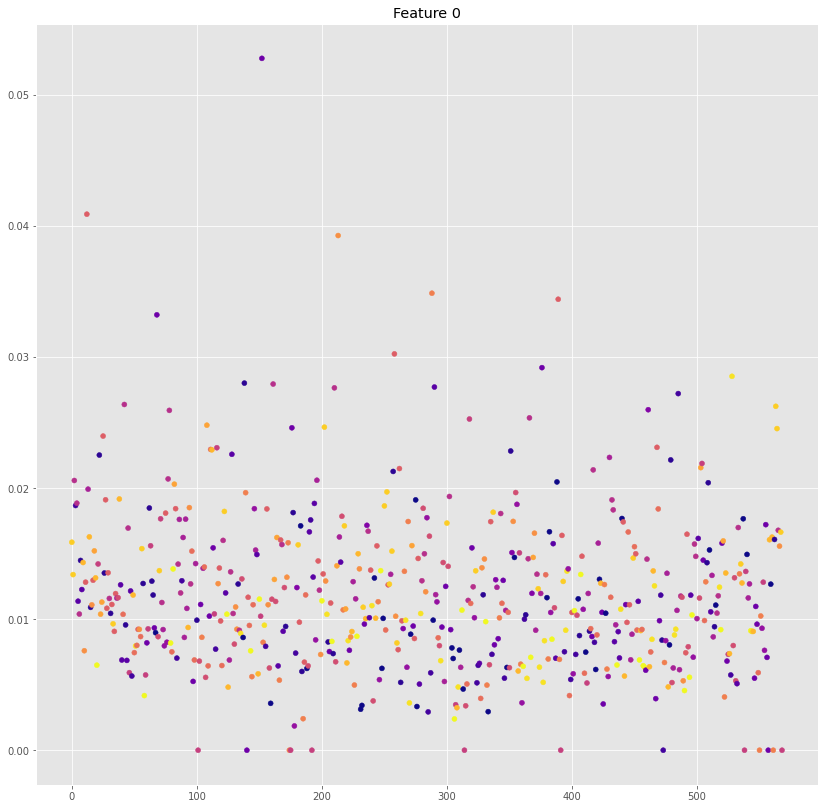

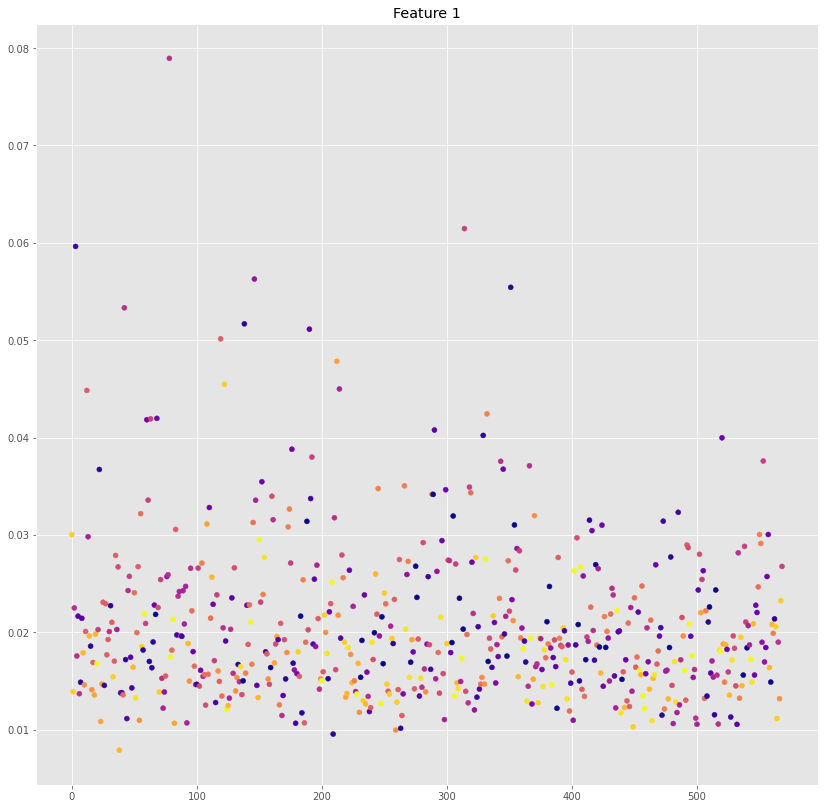

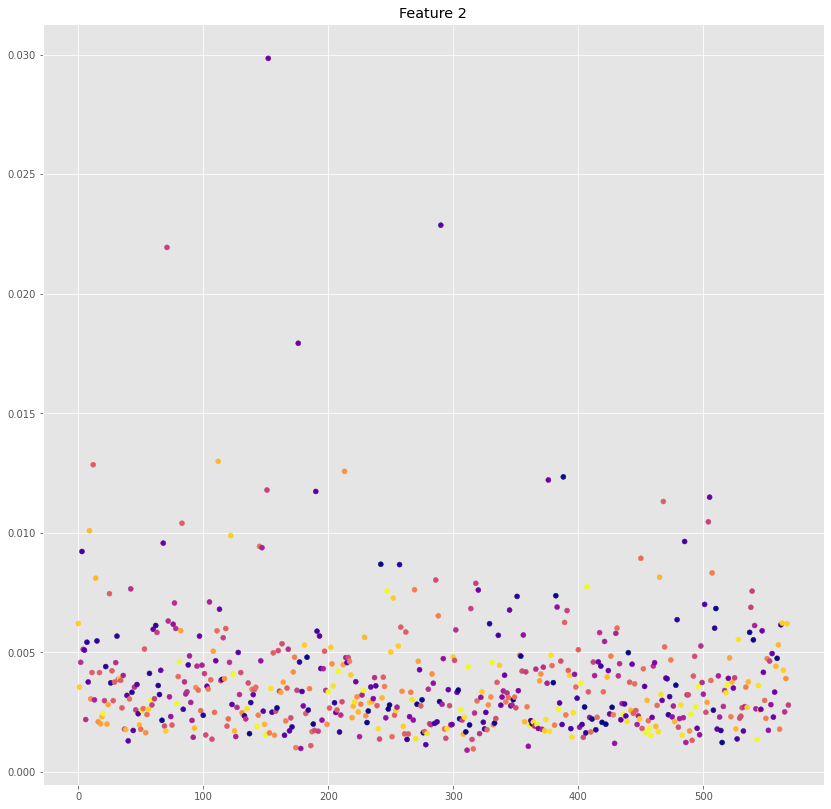

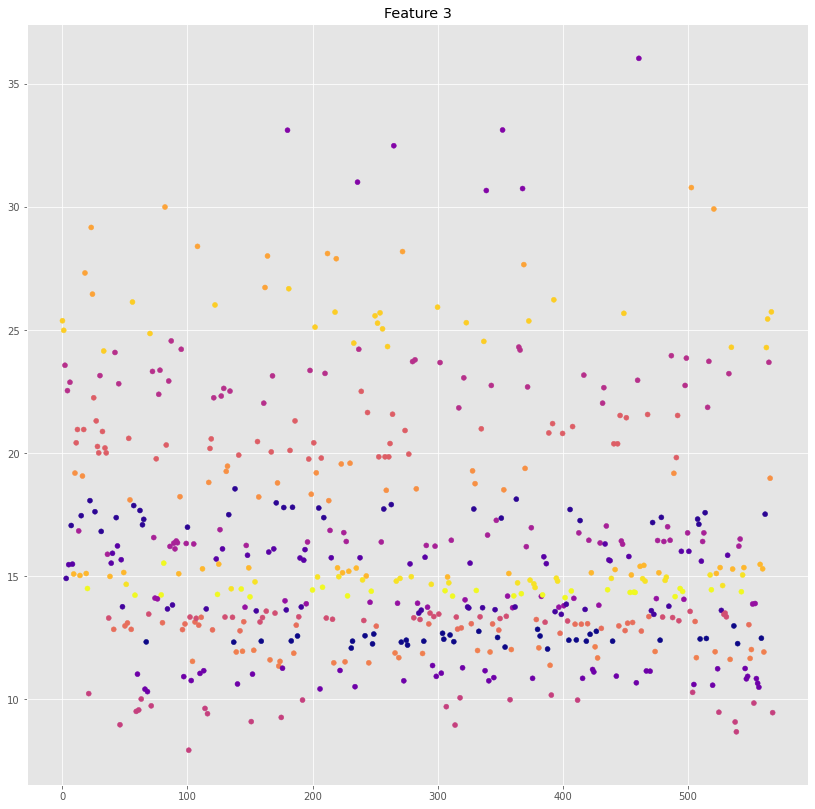

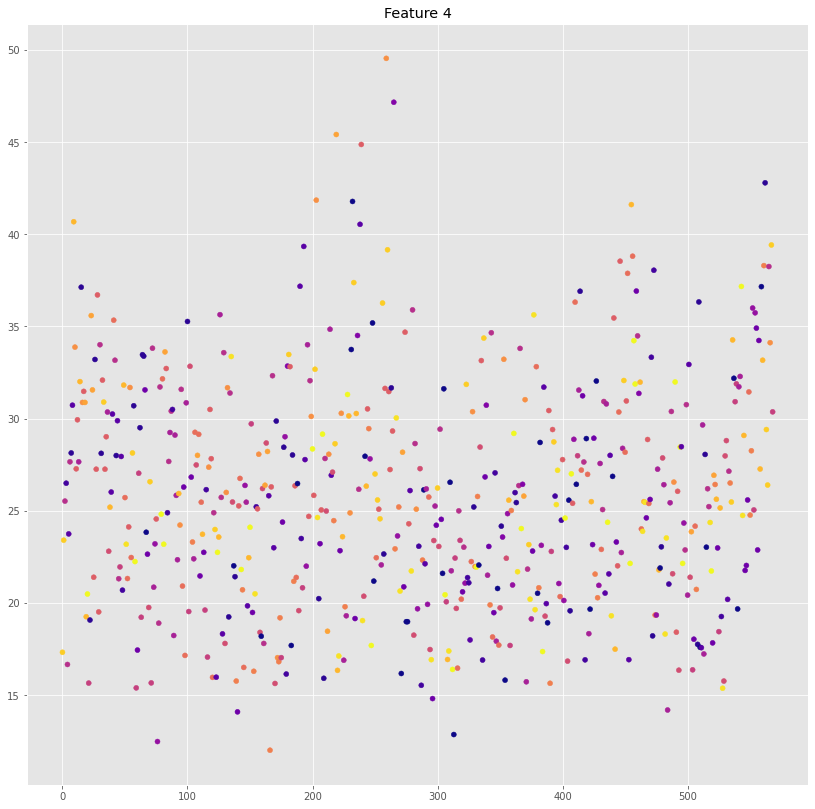

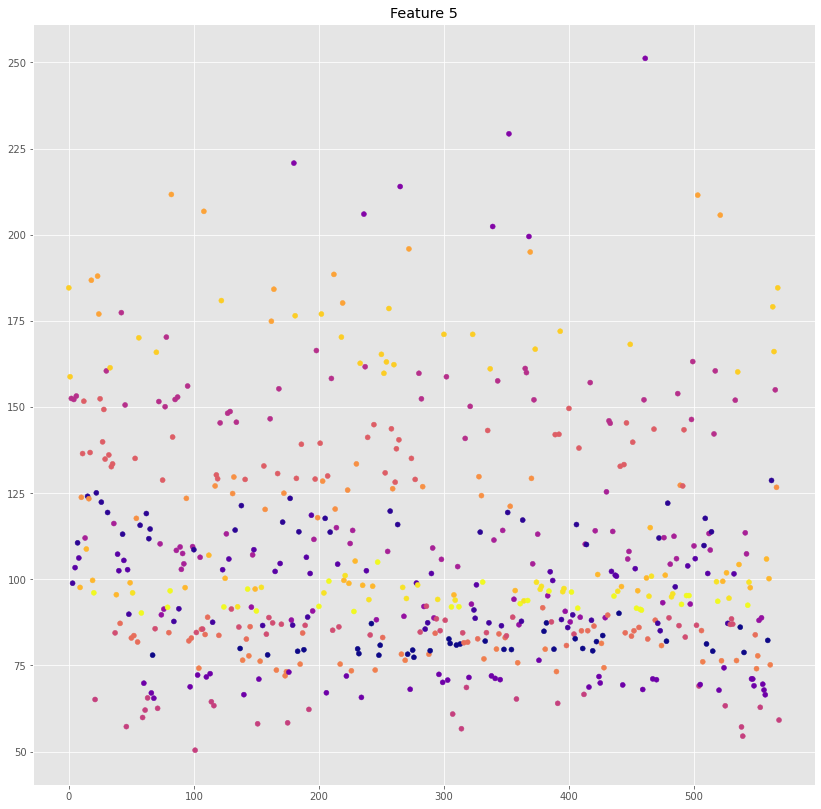

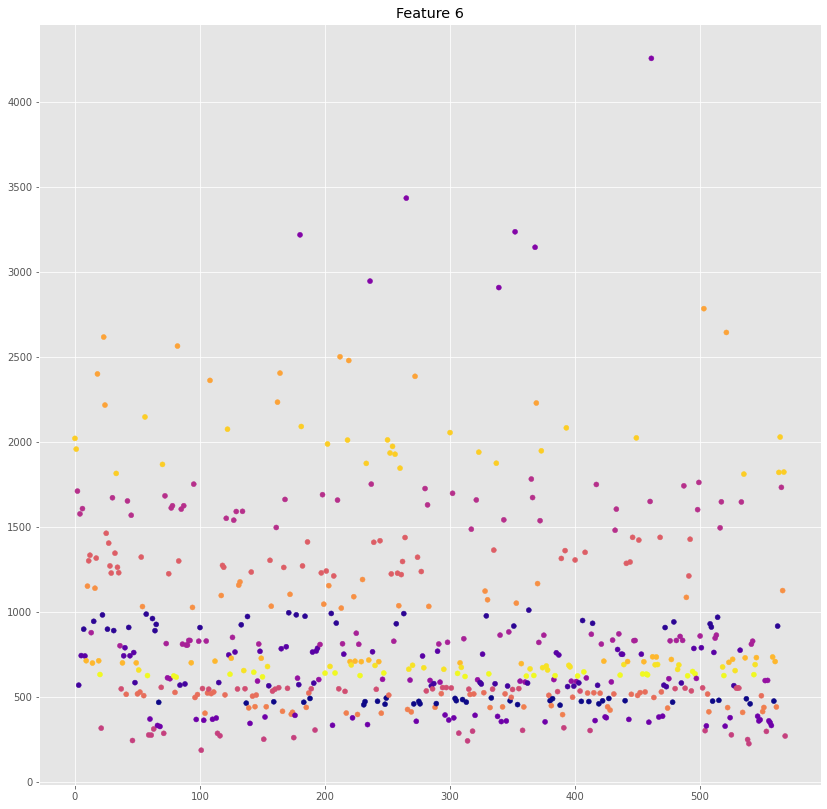

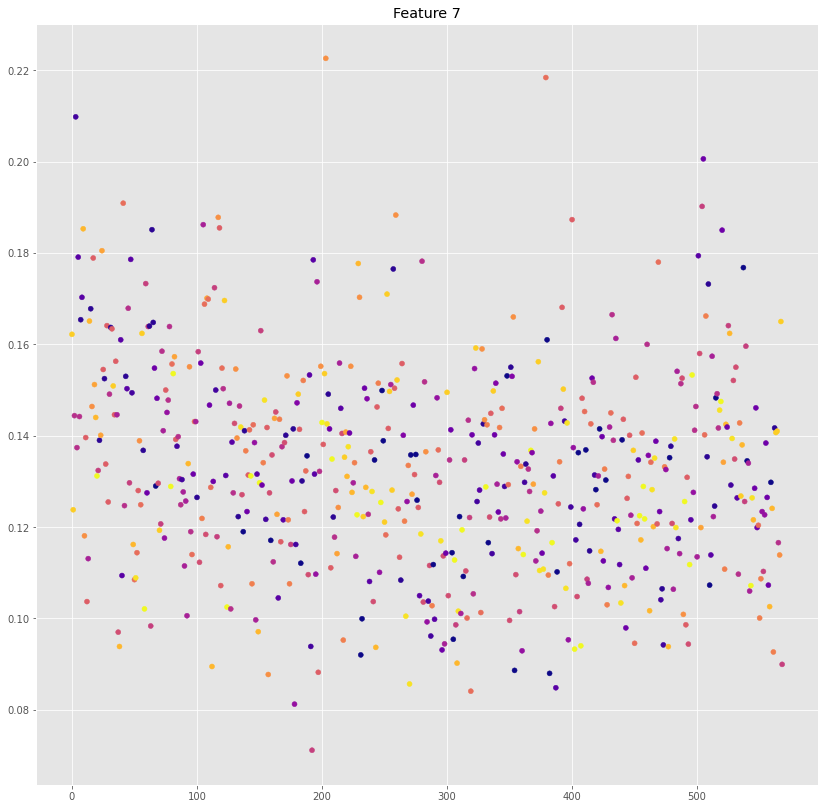

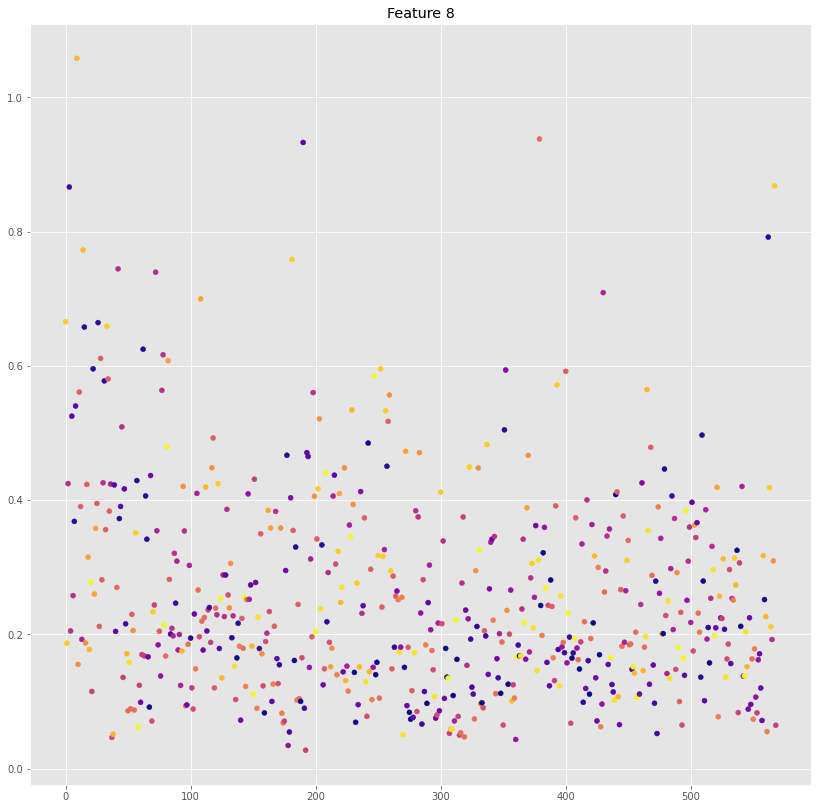

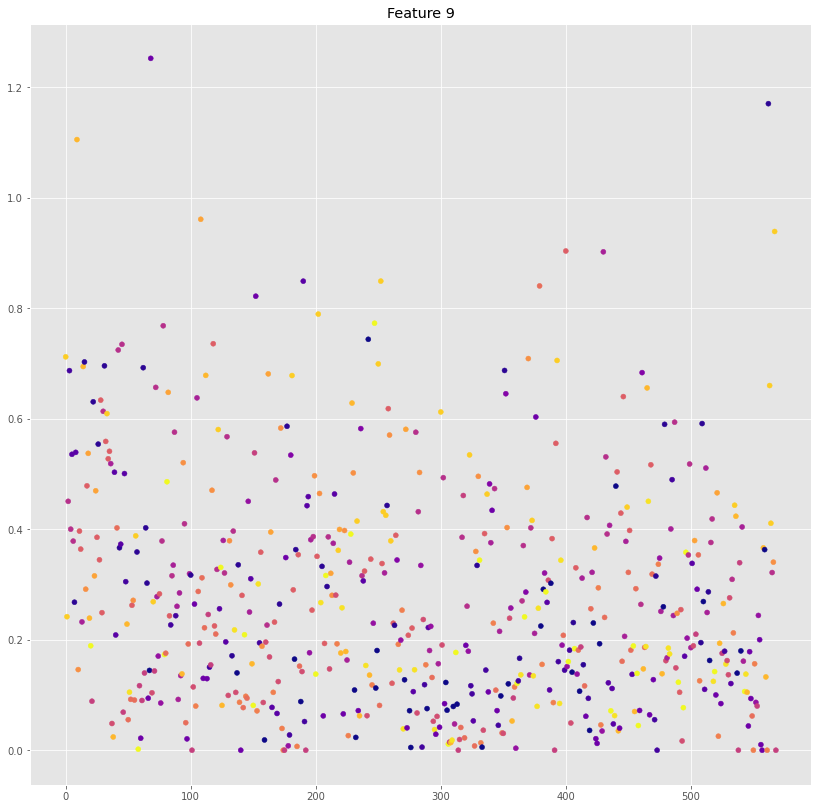

In [28]:
centroids, clusters = kmeansClustering(filename='data_q11.xlsx')